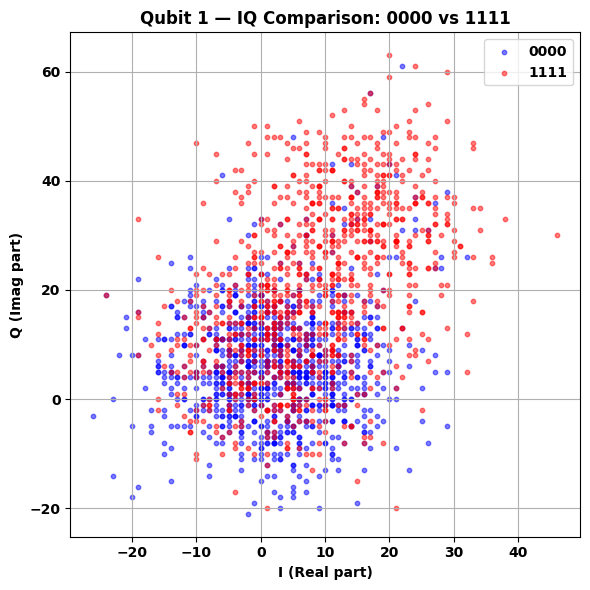

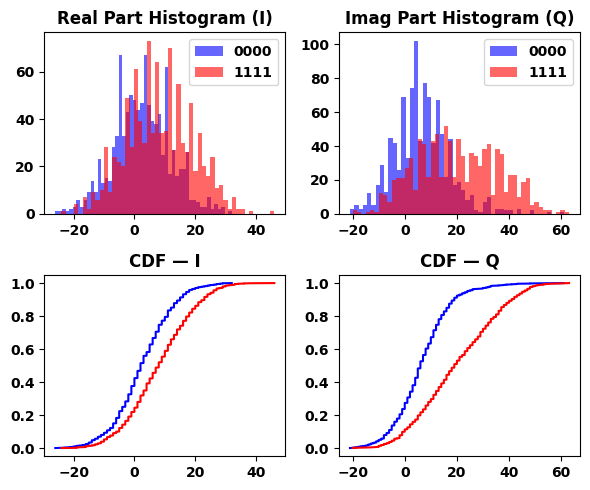

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

def load_qubit_from_file(file_path, qubit_index):
    """Load only one qubit (one line) from the file."""
    with open(file_path, "r") as f:
        lines = f.readlines()

    line = lines[qubit_index].strip().split()
    vals = np.array([parse_complex_string(v) for v in line])
    return vals  # array of 1000 complex numbers

# Plot IQ scatter plot comparing two files for a specific qubit
def plot_compare_iq(file1, file2, qubit_index):
    data1 = load_qubit_from_file(file1, qubit_index)
    data2 = load_qubit_from_file(file2, qubit_index)

    I1, Q1 = data1.real, data1.imag
    I2, Q2 = data2.real, data2.imag

    plt.figure(figsize=(6,6))
    plt.scatter(I1, Q1, s=10, alpha=0.5, label="0000", color="blue")
    plt.scatter(I2, Q2, s=10, alpha=0.5, label="1111", color="red")

    plt.xlabel("I (Real part)")
    plt.ylabel("Q (Imag part)")
    plt.title(f"Qubit {qubit_index+1} — IQ Comparison: 0000 vs 1111")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot histograms comparing two files for a specific qubit
def plot_compare_histograms(file1, file2, qubit_index):
    data1 = load_qubit_from_file(file1, qubit_index)
    data2 = load_qubit_from_file(file2, qubit_index)

    I1, Q1 = data1.real, data1.imag
    I2, Q2 = data2.real, data2.imag

    fig, axes = plt.subplots(2, 2, figsize=(6, 5))

    axes[0,0].hist(I1, bins=50, alpha=0.6, label="0000", color="blue")
    axes[0,0].hist(I2, bins=50, alpha=0.6, label="1111", color="red")
    axes[0,0].set_title("Real Part Histogram (I)")
    axes[0,0].legend()

    axes[0,1].hist(Q1, bins=50, alpha=0.6, label="0000", color="blue")
    axes[0,1].hist(Q2, bins=50, alpha=0.6, label="1111", color="red")
    axes[0,1].set_title("Imag Part Histogram (Q)")
    axes[0,1].legend()

    # Density plots برای دیدن همپوشانی بهتر
    axes[1,0].plot(sorted(I1), np.linspace(0,1,len(I1)), color="blue")
    axes[1,0].plot(sorted(I2), np.linspace(0,1,len(I2)), color="red")
    axes[1,0].set_title("CDF — I")

    axes[1,1].plot(sorted(Q1), np.linspace(0,1,len(Q1)), color="blue")
    axes[1,1].plot(sorted(Q2), np.linspace(0,1,len(Q2)), color="red")
    axes[1,1].set_title("CDF — Q")

    plt.tight_layout()
    plt.show()

qubit_index = 0  # Change this index to select different qubits (0 to 3 for 4 qubits)

file0000 = "quadrature_data_4qubits/0000.txt"
file1111 = "quadrature_data_4qubits/1111.txt"

plot_compare_iq(file0000, file1111, qubit_index)
plot_compare_histograms(file0000, file1111, qubit_index)

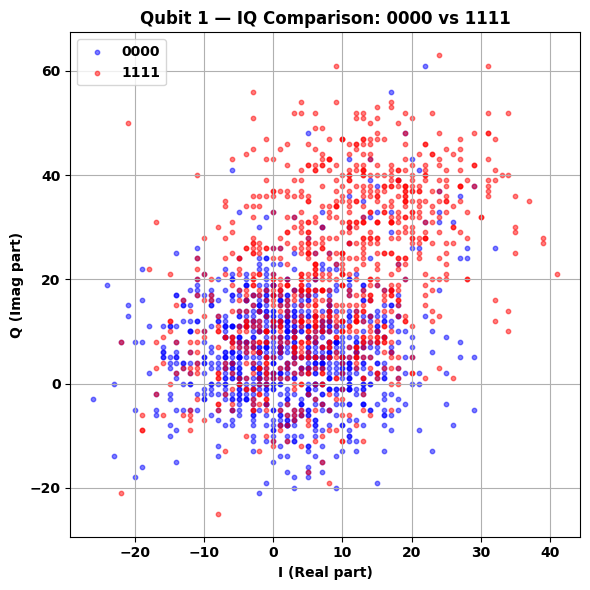

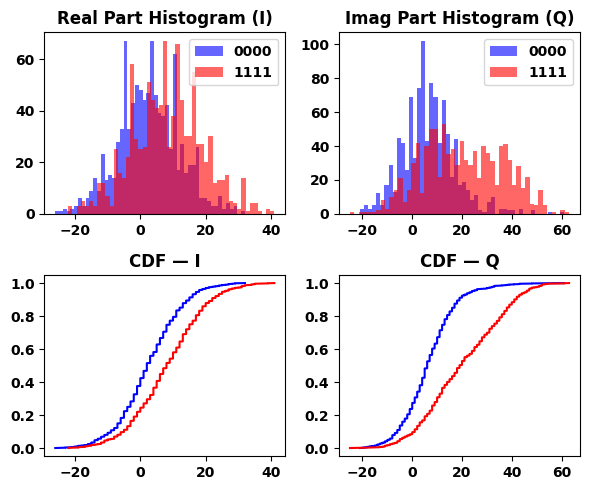

In [18]:
import numpy as np
import glob
import os

# -----------------------------------------------------------
# Helper: convert string "(a+bj)" to complex number
# -----------------------------------------------------------
def parse_complex_string(s):
    s = s.strip()
    s = s.replace("(", "").replace(")", "")
    return complex(s)

# -----------------------------------------------------------
# Main Preprocessing Function
# -----------------------------------------------------------

def load_all_qubit_files(folder_path="quadrature_data_4qubits"):
    """
    Reads all 16 files named XXXX.txt where XXXX is binary label (0000..1111)
    Returns:
        X: numpy array of shape (16000, 4)
        y: numpy array of shape (16000,)
    """

    all_files = sorted(glob.glob(os.path.join(folder_path, "*.txt")))
    
    X_list = []
    y_list = []

    print("Found files:", all_files)

    for file_path in all_files:
        filename = os.path.basename(file_path).replace(".txt", "")
        
        # Label: convert binary string to integer 0..15
        label = int(filename, 2)
        print(f"Processing file {file_path} with label {label} ({filename})")

        # Read 4 lines → each line has 1000 complex measurements
        with open(file_path, "r") as f:
            lines = f.readlines()

        if len(lines) != 4:
            raise ValueError(f"File {file_path} does not have exactly 4 lines!")

        # Convert each line into a list of complex values
        qubit_measurements = []
        for line in lines:
            values_str = line.strip().split()
            complex_values = [parse_complex_string(v) for v in values_str]
            qubit_measurements.append(complex_values)

        # Convert list of 4 lists into numpy array (4 × 1000)
        qubit_measurements = np.array(qubit_measurements)  # shape (4,1000)

        # Compute magnitude: shape still (4,1000)
        magnitudes = np.abs(qubit_measurements)

        # Transpose → shape becomes (1000,4)
        magnitudes = magnitudes.T

        # Add to dataset
        X_list.append(magnitudes)
        y_list.append(np.full(1000, label))

    # Stack all 16 blocks → (16000, 4)
    X = np.vstack(X_list)

    # Stack all labels → (16000,)
    y = np.hstack(y_list)

    print("Final dataset shape:", X.shape, y.shape)
    return X, y

# -----------------------------------------------------------
# Run the preprocessing
# -----------------------------------------------------------

X, y = load_all_qubit_files(folder_path="quadrature_data_4qubits")

np.savetxt("dataset_X.txt", X)
np.savetxt("dataset_y.txt", y, fmt="%d")

print("Saved dataset_X.txt and dataset_y.txt")


Found files: ['quadrature_data_4qubits\\0000.txt', 'quadrature_data_4qubits\\0001.txt', 'quadrature_data_4qubits\\0010.txt', 'quadrature_data_4qubits\\0011.txt', 'quadrature_data_4qubits\\0100.txt', 'quadrature_data_4qubits\\0101.txt', 'quadrature_data_4qubits\\0110.txt', 'quadrature_data_4qubits\\0111.txt', 'quadrature_data_4qubits\\1000.txt', 'quadrature_data_4qubits\\1001.txt', 'quadrature_data_4qubits\\1010.txt', 'quadrature_data_4qubits\\1011.txt', 'quadrature_data_4qubits\\1100.txt', 'quadrature_data_4qubits\\1101.txt', 'quadrature_data_4qubits\\1110.txt', 'quadrature_data_4qubits\\1111.txt']
Processing file quadrature_data_4qubits\0000.txt with label 0 (0000)
Processing file quadrature_data_4qubits\0001.txt with label 1 (0001)
Processing file quadrature_data_4qubits\0010.txt with label 2 (0010)
Processing file quadrature_data_4qubits\0011.txt with label 3 (0011)
Processing file quadrature_data_4qubits\0100.txt with label 4 (0100)
Processing file quadrature_data_4qubits\0101.txt 

#### visualisation 

In [19]:
import numpy as np

y = np.loadtxt("dataset_y.txt").astype(int)

print("Unique labels:", np.unique(y))
print("Number of unique classes:", len(np.unique(y)))

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Number of unique classes: 16


In [20]:
import glob

files = sorted(glob.glob("dataset_X.txt"))

for f in files:
    with open(f) as file:
        lines = file.readlines()

    print(f, "– number of lines =", len(lines))
    for i, line in enumerate(lines):
        print("   line", i, "length =", len(line.strip().split()))

dataset_X.txt – number of lines = 16000
   line 0 length = 4
   line 1 length = 4
   line 2 length = 4
   line 3 length = 4
   line 4 length = 4
   line 5 length = 4
   line 6 length = 4
   line 7 length = 4
   line 8 length = 4
   line 9 length = 4
   line 10 length = 4
   line 11 length = 4
   line 12 length = 4
   line 13 length = 4
   line 14 length = 4
   line 15 length = 4
   line 16 length = 4
   line 17 length = 4
   line 18 length = 4
   line 19 length = 4
   line 20 length = 4
   line 21 length = 4
   line 22 length = 4
   line 23 length = 4
   line 24 length = 4
   line 25 length = 4
   line 26 length = 4
   line 27 length = 4
   line 28 length = 4
   line 29 length = 4
   line 30 length = 4
   line 31 length = 4
   line 32 length = 4
   line 33 length = 4
   line 34 length = 4
   line 35 length = 4
   line 36 length = 4
   line 37 length = 4
   line 38 length = 4
   line 39 length = 4
   line 40 length = 4
   line 41 length = 4
   line 42 length = 4
   line 43 length = 4
  

X shape: (16000, 4)
y shape: (16000,)
PCA shape: (16000, 2)


C:\Users\10\AppData\Local\Temp\ipykernel_4832\903026700.py:49: UserWarning: Mismatched number of handles and labels: len(handles) = 8 len(labels) = 16
  plt.legend(


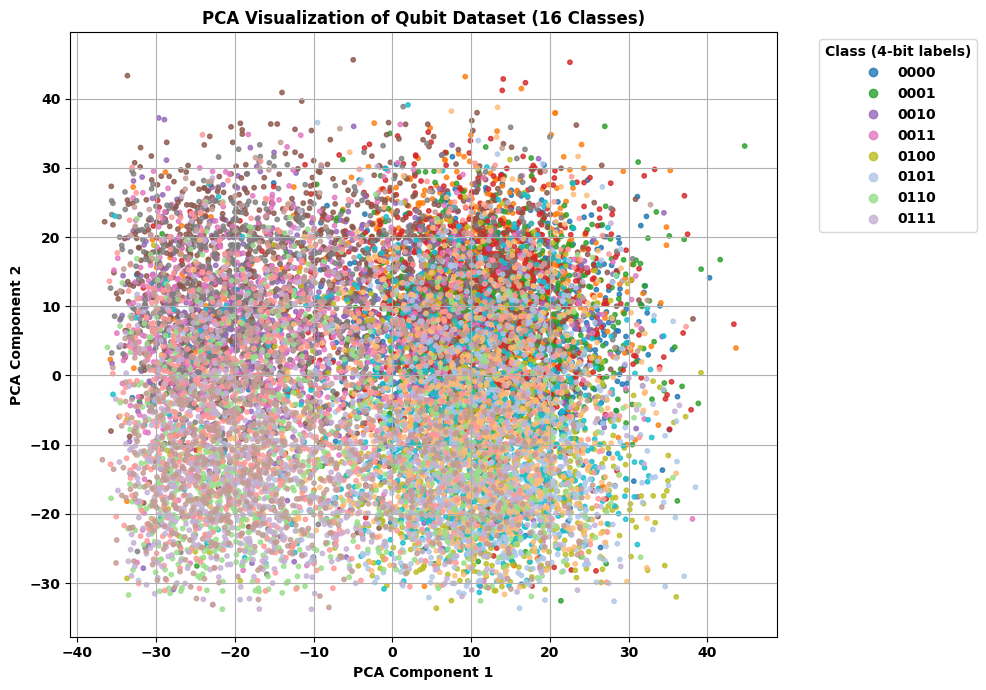

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# ------------------------------------------
# 1) Load processed dataset
# ------------------------------------------
X = np.loadtxt("dataset_X.txt")
y = np.loadtxt("dataset_y.txt").astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------------------
# 2) Reduce dimension: 4D → 2D using PCA
# ------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA shape:", X_pca.shape)

# ------------------------------------------
# 3) Define 16 distinguishable colors
# ------------------------------------------
colors_16 = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#aec7e8", "#ffbb78",
    "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"
]

cmap = ListedColormap(colors_16)

# ------------------------------------------
# 4) Scatter Plot with 16 colors
# ------------------------------------------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap=cmap, s=10, alpha=0.8
)

plt.title("PCA Visualization of Qubit Dataset (16 Classes)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Show color legend
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[format(i, '04b') for i in range(16)],  # Show labels as binary
    title="Class (4-bit labels)",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.grid(True)
plt.tight_layout()
plt.show()


X shape: (16000, 4)
y shape: (16000,)
t-SNE output shape: (16000, 2)


AttributeError: 'list' object has no attribute 'astype'

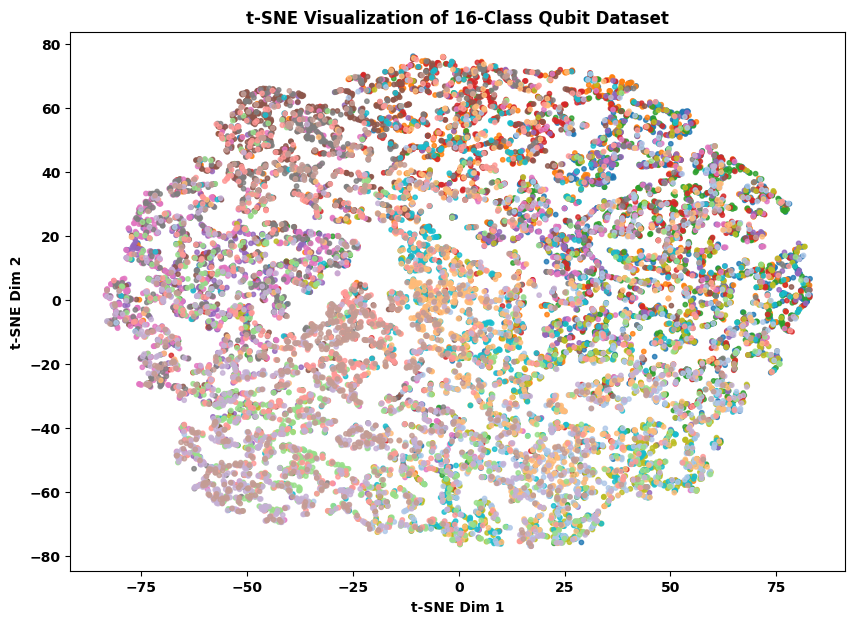

In [8]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1) Load dataset
X = np.loadtxt("dataset_X.txt")
y = np.loadtxt("dataset_y.txt").astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

# 2) t-SNE (4D → 2D)  — بدون n_iter
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    init='pca',
    random_state=42
)

X_tsne = tsne.fit_transform(X)
print("t-SNE output shape:", X_tsne.shape)

# 3) Colors & plot
colors_16 = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#aec7e8", "#ffbb78",
    "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"
]
cmap = ListedColormap(colors_16)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    cmap=cmap,
    s=10,
    alpha=0.8
)

plt.title("t-SNE Visualization of 16-Class Qubit Dataset")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")

handles, unique_labels = scatter.legend_elements()
unique_labels = unique_labels.astype(int)
binary_labels = [format(l, '04b') for l in unique_labels]

plt.legend(
    handles,
    binary_labels,
    title="Classes (binary)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.grid(True)
plt.tight_layout()
plt.show()


X shape: (16000, 4)
y shape: (16000,)


c:\Users\10\anaconda3\envs\qcomputing\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP output shape: (16000, 2)


ValueError: invalid literal for int() with base 10: '$\\mathdefault{0}$'

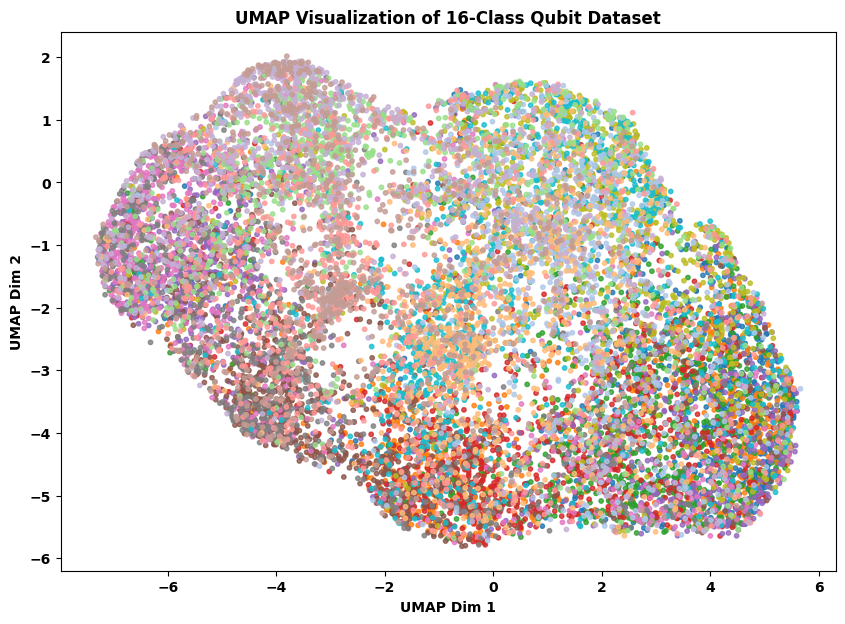

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from matplotlib.colors import ListedColormap

# ------------------------------------------
# 1) Load the dataset
# ------------------------------------------
X = np.loadtxt("dataset_X.txt")
y = np.loadtxt("dataset_y.txt").astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------------------
# 2) UMAP (4D → 2D)
# ------------------------------------------
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=30,      # similar to perplexity in t-SNE
    min_dist=0.1,        # lower = tighter clusters
    metric="euclidean",
    random_state=42
)

X_umap = reducer.fit_transform(X)
print("UMAP output shape:", X_umap.shape)

# ------------------------------------------
# 3) Define 16 distinct colors
# ------------------------------------------
colors_16 = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#aec7e8", "#ffbb78",
    "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"
]

cmap = ListedColormap(colors_16)

# ------------------------------------------
# 4) Scatter plot
# ------------------------------------------
plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=y,
    cmap=cmap,
    s=10,
    alpha=0.8
)

plt.title("UMAP Visualization of 16-Class Qubit Dataset")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")

# --- Legend that matches existing classes ---
handles, unique_labels = scatter.legend_elements()

# Convert to numpy array safely
unique_labels = np.array(unique_labels, dtype=int)

# Convert labels to 4-bit binary strings
binary_labels = [format(l, '04b') for l in unique_labels]

plt.legend(
    handles,
    binary_labels,
    title="Classes (binary)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.grid(True)
plt.tight_layout() 
plt.show()


### PyTorch Classification

Loaded dataset shapes: (16000, 4) (16000,)
Dataset sizes:
Train: 11200
Val: 2400
Test: 2400
Epoch 00 | Train Loss: 2.4227 | Val Loss: 2.3552 | Val Acc: 0.219
Epoch 10 | Train Loss: 2.2038 | Val Loss: 2.2248 | Val Acc: 0.292
Epoch 20 | Train Loss: 2.1957 | Val Loss: 2.1480 | Val Acc: 0.311
Epoch 30 | Train Loss: 2.1974 | Val Loss: 2.1539 | Val Acc: 0.295
Epoch 40 | Train Loss: 2.1993 | Val Loss: 2.1546 | Val Acc: 0.299
Epoch 50 | Train Loss: 2.1922 | Val Loss: 2.1984 | Val Acc: 0.287
Epoch 60 | Train Loss: 2.1845 | Val Loss: 2.1499 | Val Acc: 0.300
Epoch 70 | Train Loss: 2.1924 | Val Loss: 2.2023 | Val Acc: 0.288
Epoch 80 | Train Loss: 2.1958 | Val Loss: 2.1834 | Val Acc: 0.290
Epoch 90 | Train Loss: 2.1925 | Val Loss: 2.2344 | Val Acc: 0.283
Epoch 100 | Train Loss: 2.1838 | Val Loss: 2.1724 | Val Acc: 0.300
Epoch 110 | Train Loss: 2.1849 | Val Loss: 2.1518 | Val Acc: 0.295
Epoch 120 | Train Loss: 2.1881 | Val Loss: 2.1897 | Val Acc: 0.283
Epoch 130 | Train Loss: 2.1859 | Val Loss: 2.14

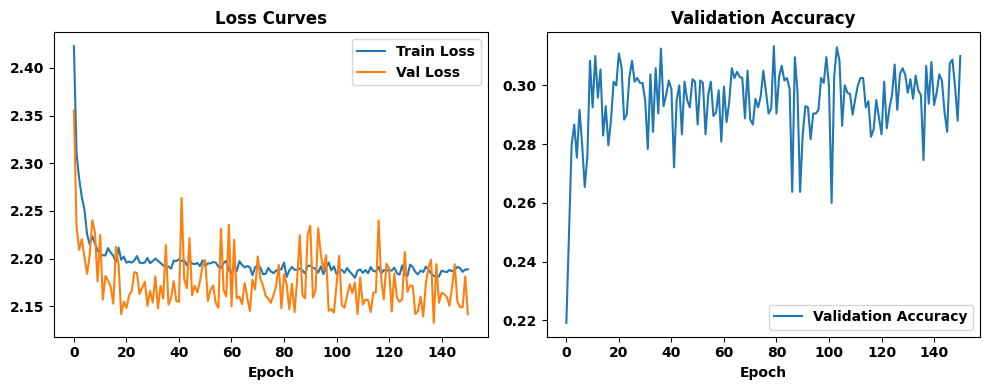

Model saved as qubit_classifier_v1.pt


In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt


# -----------------------------------------------------------
# 1) Load dataset (from preprocessing step)
# -----------------------------------------------------------
X = np.loadtxt("dataset_X.txt")
y = np.loadtxt("dataset_y.txt").astype(int)

print("Loaded dataset shapes:", X.shape, y.shape)


# -----------------------------------------------------------
# 2) Define PyTorch Dataset class
# -----------------------------------------------------------
class QubitDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)  # long for classification

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


dataset = QubitDataset(X, y)


# -----------------------------------------------------------
# 3) Train/Val/Test split   (70 / 15 / 15)
# -----------------------------------------------------------
total_size = len(dataset)
train_size = int(0.70 * total_size)
val_size   = int(0.15 * total_size)
test_size  = total_size - train_size - val_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

print("Dataset sizes:")
print("Train:", len(train_ds))
print("Val:", len(val_ds))
print("Test:", len(test_ds))


# -----------------------------------------------------------
# 4) DataLoaders
# -----------------------------------------------------------
batch_size = 32

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False)


# -----------------------------------------------------------
# 5) Build MLP model (4 → 32 → 16 → 16 classes)
# -----------------------------------------------------------
class QubitClassifier(nn.Module):
    def __init__(self):
        super(QubitClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            # nn.GELU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 16)  # output 16 classes
        )
        # super().__init__()
        # self.net = nn.Sequential(
        #     nn.Linear(4, 64),
        #     nn.BatchNorm1d(64),
        #     nn.ReLU(),

        #     nn.Linear(64, 128),
        #     nn.BatchNorm1d(128),
        #     nn.ReLU(),

        #     nn.Linear(128, 64),
        #     nn.BatchNorm1d(64),
        #     nn.ReLU(),

        #     nn.Linear(64, 16)
        # )
    def forward(self, x):
        return self.net(x)


model = QubitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# -----------------------------------------------------------
# 6) Training Loop
# -----------------------------------------------------------
EPOCHS = 151
train_losses = []
val_losses = []
val_acc_list = []

for epoch in range(EPOCHS):

    # ---- Training ----
    model.train()
    running_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # ---- Validation ----
    model.eval()
    val_loss = 0
    correct = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y_batch).sum().item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    val_acc = correct / len(val_ds)
    val_acc_list.append(val_acc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f}")


# -----------------------------------------------------------
# 7) Evaluate on Test Set
# -----------------------------------------------------------
model.eval()
correct = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == y_batch).sum().item()

test_acc = correct / len(test_ds)

print("\nFinal Test Accuracy =", test_acc)


# -----------------------------------------------------------
# 8) Plot training curves
# -----------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curves")
plt.xlabel("Epoch")

plt.subplot(1,2,2)
plt.plot(val_acc_list, label="Validation Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.xlabel("Epoch")

plt.tight_layout()
plt.show()


# -----------------------------------------------------------
# 9) Save trained model
# -----------------------------------------------------------
torch.save(model.state_dict(), "qubit_classifier_v1.pt")
print("Model saved as qubit_classifier_v1.pt")


In [ ]:
# New strategy: data engineering 
# each qubit represented by 4 features:
# [mag1, phase1, real1, imag1, 
#  mag2, phase2, real2, imag2,
#  mag3, phase3, real3, imag3,
#  mag4, phase4, real4, imag4]

In [1]:
import numpy as np
import glob
import os
import math
# -----------------------------------------------------------
# Helper: convert "(a+bj)" string → complex number
# -----------------------------------------------------------
def parse_complex_string(s):
    s = s.strip()
    s = s.replace("(", "").replace(")", "")
    return complex(s)
# -----------------------------------------------------------
# Create full feature vector for each sample
# mag, phase, real, imag for each of 4 qubits
# -----------------------------------------------------------
def extract_features(complex_array_4qubits):
    """
    complex_array_4qubits: shape (4,) each element is complex
    returns 8 features
    """
    features = []
    for z in complex_array_4qubits:
        real = z.real
        imag = z.imag
        # mag = abs(z)
        # phase = math.atan2(imag, real)
        features.extend([real, imag])
    return features
# -----------------------------------------------------------
# Main loader for all 16 files
# -----------------------------------------------------------
def load_and_process_files(folder_path="quadrature_data_4qubits"):
    all_files = sorted(glob.glob(os.path.join(folder_path, "*.txt")))

    X_list = []
    y_list = []

    print("Found files:", all_files)

    for file_path in all_files:

        filename = os.path.basename(file_path).replace(".txt", "")
        label = int(filename, 2)  # convert binary label to int 0..15

        print(f"Processing file {file_path} → label {label}")

        with open(file_path, "r") as f:
            lines = f.readlines()

        if len(lines) != 4:
            raise ValueError(f"File {file_path} must contain exactly 4 lines!")

        # each line = 1000 complex values
        qubit_data = []
        for line in lines:
            values_str = line.strip().split()
            complex_values = [parse_complex_string(v) for v in values_str]
            qubit_data.append(complex_values)

        qubit_data = np.array(qubit_data)  # shape (4, 1000)

        # transpose → shape (1000, 4)
        qubit_data = qubit_data.T

        # build 1000 × 16 feature matrix
        for sample in qubit_data:
            feats = extract_features(sample)
            X_list.append(feats)
            y_list.append(label)

    X = np.array(X_list, dtype=np.float32)
    y = np.array(y_list, dtype=np.int32)

    print("Final dataset shape:")
    print("X:", X.shape)
    print("y:", y.shape)

    return X, y
# -----------------------------------------------------------
# Run the processing and save
# -----------------------------------------------------------
X, y = load_and_process_files("quadrature_data_4qubits")

np.savetxt("dataset_X_v2.txt", X)
np.savetxt("dataset_y_v2.txt", y, fmt="%d")

print("\nSaved: dataset_X_v2.txt  and  dataset_y_v2.txt")

Found files: ['quadrature_data_4qubits\\0000.txt', 'quadrature_data_4qubits\\0001.txt', 'quadrature_data_4qubits\\0010.txt', 'quadrature_data_4qubits\\0011.txt', 'quadrature_data_4qubits\\0100.txt', 'quadrature_data_4qubits\\0101.txt', 'quadrature_data_4qubits\\0110.txt', 'quadrature_data_4qubits\\0111.txt', 'quadrature_data_4qubits\\1000.txt', 'quadrature_data_4qubits\\1001.txt', 'quadrature_data_4qubits\\1010.txt', 'quadrature_data_4qubits\\1011.txt', 'quadrature_data_4qubits\\1100.txt', 'quadrature_data_4qubits\\1101.txt', 'quadrature_data_4qubits\\1110.txt', 'quadrature_data_4qubits\\1111.txt']
Processing file quadrature_data_4qubits\0000.txt → label 0
Processing file quadrature_data_4qubits\0001.txt → label 1
Processing file quadrature_data_4qubits\0010.txt → label 2
Processing file quadrature_data_4qubits\0011.txt → label 3
Processing file quadrature_data_4qubits\0100.txt → label 4
Processing file quadrature_data_4qubits\0101.txt → label 5
Processing file quadrature_data_4qubits\

In [ ]:
###  data sets with 

Loaded: (16000, 8) (16000,)
Train: 11200 Val: 2400 Test: 2400
Epoch 000 | Train: 2.1703 | Train Acc: 33.625% | Val: 2.0280 | Val Acc: 39.458%
Epoch 001 | Train: 2.0494 | Train Acc: 36.705% | Val: 2.0200 | Val Acc: 39.667%
Epoch 002 | Train: 2.0485 | Train Acc: 36.679% | Val: 2.0276 | Val Acc: 39.083%
Epoch 003 | Train: 2.0480 | Train Acc: 37.080% | Val: 2.0270 | Val Acc: 39.208%
Epoch 004 | Train: 2.0473 | Train Acc: 36.723% | Val: 2.0240 | Val Acc: 39.333%
Epoch 005 | Train: 2.0482 | Train Acc: 36.286% | Val: 2.0240 | Val Acc: 39.208%
Epoch 006 | Train: 2.0453 | Train Acc: 36.848% | Val: 2.0317 | Val Acc: 39.375%
Epoch 007 | Train: 2.0478 | Train Acc: 36.821% | Val: 2.0253 | Val Acc: 39.208%
Epoch 008 | Train: 2.0481 | Train Acc: 36.920% | Val: 2.0249 | Val Acc: 39.208%
Epoch 009 | Train: 2.0447 | Train Acc: 37.071% | Val: 2.0289 | Val Acc: 38.917%
Epoch 010 | Train: 2.0482 | Train Acc: 36.884% | Val: 2.0204 | Val Acc: 39.083%
Epoch 011 | Train: 2.0443 | Train Acc: 37.107% | Val: 2.02

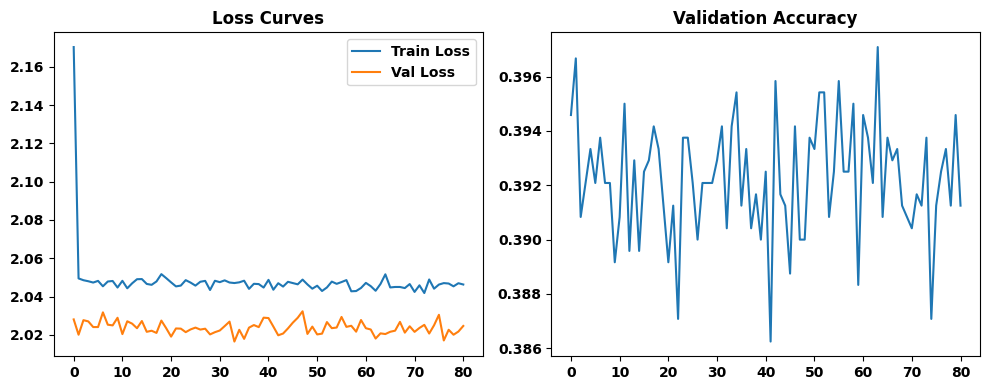

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# -----------------------------------------------------------
# 1) Load v2 dataset (16 features)
# -----------------------------------------------------------
X = np.loadtxt("dataset_X_v2.txt")
y = np.loadtxt("dataset_y_v2.txt").astype(int)

print("Loaded:", X.shape, y.shape)

# -----------------------------------------------------------
# 2) PyTorch Dataset class
# -----------------------------------------------------------
class QubitDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# -----------------------------------------------------------
# 3) Stratified Split (70/15/15)
# -----------------------------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

train_ds = QubitDataset(X_train, y_train)
val_ds   = QubitDataset(X_val, y_val)
test_ds  = QubitDataset(X_test, y_test)

print("Train:", len(train_ds), "Val:", len(val_ds), "Test:", len(test_ds))

# -----------------------------------------------------------
# 4) DataLoaders
# -----------------------------------------------------------
batch_size = 32

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)

# -----------------------------------------------------------
# 5) Build improved MLP Model
# -----------------------------------------------------------
class QubitClassifierV2(nn.Module):
    def __init__(self):
        # super().__init__()
        # self.net = nn.Sequential(
        #     nn.Linear(16, 64),
        #     nn.BatchNorm1d(64),
        #     nn.GELU(),
        #     nn.Linear(64, 128),
        #     nn.BatchNorm1d(128),
        #     nn.GELU(),
        #     nn.Linear(128, 64),
        #     nn.BatchNorm1d(64),
        #     nn.GELU(),

        #     nn.Linear(64, 32),
        #     nn.BatchNorm1d(32),
        #     nn.GELU(),
        #     nn.Linear(32, 16)  # 16 classes
        # )
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(8, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 16)
        )
    def forward(self, x):
        return self.net(x)

model = QubitClassifierV2()

# -----------------------------------------------------------
# 6) Optimizer and Loss
# -----------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0007)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.7, patience=20
)

# -----------------------------------------------------------
# 7) Training Loop + Early Stopping
# -----------------------------------------------------------
EPOCHS = 81
best_val_loss = float('inf')
patience = 51
counter = 0

train_losses = []
val_losses = []
val_acc_list = []

for epoch in range(EPOCHS):

    model.train()
    total_train_loss = 0

    correct_train = 0
    total_train = 0

    for Xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        scheduler.step(loss)
        total_train_loss += loss.item()

        preds = torch.argmax(out, dim=1)
        correct_train += (preds == yb).sum().item()
        total_train += len(yb)

    train_loss = total_train_loss / len(train_loader)
    train_losses.append(train_loss)

    train_acc = correct_train / total_train

    # ---- Validation ----
    model.eval()
    total_val_loss = 0
    correct = 0

    with torch.no_grad():
        for Xb, yb in val_loader:
            out = model(Xb)
            loss = criterion(out, yb)
            total_val_loss += loss.item()

            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()

    val_loss = total_val_loss / len(val_loader)
    val_acc = correct / len(val_ds)

    val_losses.append(val_loss)
    val_acc_list.append(val_acc)

    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | Train: {train_loss:.4f} | Train Acc: {100*train_acc:.3f}% | Val: {val_loss:.4f} | Val Acc: {100*val_acc:.3f}%")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_qubit_model_v2.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

# -----------------------------------------------------------
# 8) Evaluate Test Accuracy
# -----------------------------------------------------------
model.load_state_dict(torch.load("best_qubit_model_v2.pt"))
model.eval()

correct = 0

with torch.inference_mode(): # or alternatively with torch.no_grad():
    for Xb, yb in test_loader:
        out = model(Xb)
        preds = torch.argmax(out, dim=1)
        correct += (preds == yb).sum().item()

test_acc = correct / len(test_ds)

print("\nFinal Test Accuracy =", 100* test_acc)
# -----------------------------------------------------------
# 9) Plot curves
# -----------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(1,2,2)
plt.plot(val_acc_list)
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()

In [ ]:
#### above output shiws training accuracy and test accurasy are closed!
### so the model is not overfitting!
### 40 percent accuracy shows the model learning something but maybe:
### more data features needed or
### should concider interactions between qubits rather than concering single qubits
#### output labels should be revisited and creat some cluster from 16 output labels

#### lets do some data engineering

## Multi-Label Binary Classification (4-bit vectors)

Loaded X: (16000, 8)  y: (16000,)
Converted labels shape: (16000, 4)
Train: 11200 Val: 2400 Test: 2400
Epoch 000 | Train Loss: 0.5283 | Train Acc: 0.339 | Val Loss: 0.4875 | Val Acc: 0.388
Epoch 001 | Train Loss: 0.4988 | Train Acc: 0.362 | Val Loss: 0.4824 | Val Acc: 0.393
Epoch 002 | Train Loss: 0.4952 | Train Acc: 0.366 | Val Loss: 0.4787 | Val Acc: 0.401
Epoch 003 | Train Loss: 0.4949 | Train Acc: 0.368 | Val Loss: 0.4797 | Val Acc: 0.390
Epoch 004 | Train Loss: 0.4937 | Train Acc: 0.367 | Val Loss: 0.4802 | Val Acc: 0.400
Epoch 005 | Train Loss: 0.4910 | Train Acc: 0.369 | Val Loss: 0.4764 | Val Acc: 0.397
Epoch 006 | Train Loss: 0.4905 | Train Acc: 0.371 | Val Loss: 0.4784 | Val Acc: 0.393
Epoch 007 | Train Loss: 0.4914 | Train Acc: 0.368 | Val Loss: 0.4785 | Val Acc: 0.398
Epoch 008 | Train Loss: 0.4909 | Train Acc: 0.364 | Val Loss: 0.4802 | Val Acc: 0.395
Epoch 009 | Train Loss: 0.4882 | Train Acc: 0.374 | Val Loss: 0.4799 | Val Acc: 0.394
Epoch 010 | Train Loss: 0.4892 | Trai

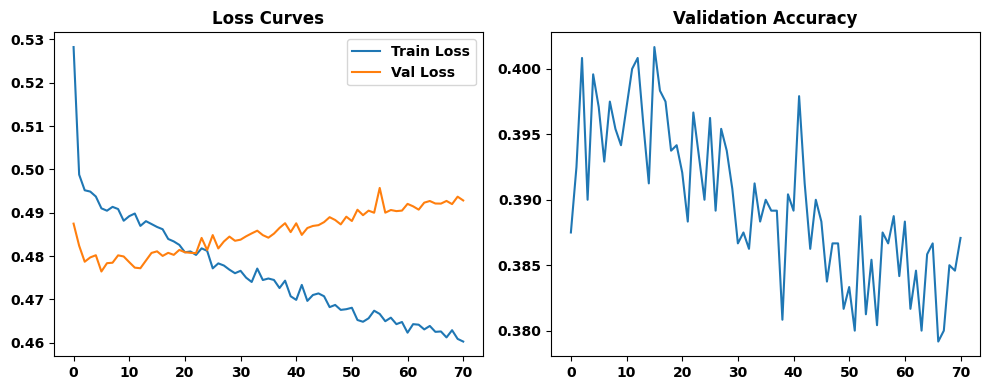

In [7]:
### Lets examine new strategy to model

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
# -----------------------------------------------------------
# 1) Load 8-feature dataset
# -----------------------------------------------------------
X = np.loadtxt("dataset_X_v2.txt")
y_int = np.loadtxt("dataset_y_v2.txt").astype(int)

print("Loaded X:", X.shape, " y:", y_int.shape)

# -----------------------------------------------------------
# 2) Convert integer labels (0..15) → 4-bit vectors
# -----------------------------------------------------------
def int_to_bits(n):
    """Convert integer 0..15 to 4-bit vector."""
    return np.array([int(b) for b in format(n, "04b")], dtype=np.float32)

y_bits = np.array([int_to_bits(n) for n in y_int], dtype=np.float32)
print("Converted labels shape:", y_bits.shape)  # (16000, 4)

# -----------------------------------------------------------
# 3) PyTorch Dataset
# -----------------------------------------------------------
class QubitDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)  # (N, 4)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# -----------------------------------------------------------
# 4) Stratified Split (still using integer labels for stratification)
# -----------------------------------------------------------
X_train, X_temp, y_train_bits, y_temp_bits, y_train_int, y_temp_int = train_test_split(
    X, y_bits, y_int, test_size=0.30, stratify=y_int, random_state=42
)
X_val, X_test, y_val_bits, y_test_bits, y_val_int, y_test_int = train_test_split(
    X_temp, y_temp_bits, y_temp_int, test_size=0.50, stratify=y_temp_int, random_state=42
)

train_ds = QubitDataset(X_train, y_train_bits)
val_ds   = QubitDataset(X_val, y_val_bits)
test_ds  = QubitDataset(X_test, y_test_bits)

print("Train:", len(train_ds), "Val:", len(val_ds), "Test:", len(test_ds))

# -----------------------------------------------------------
# 5) DataLoaders
# -----------------------------------------------------------
batch_size = 32
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)

# -----------------------------------------------------------
# 6) Model Architecture (8 → ... → 4)
# -----------------------------------------------------------
class QubitBinaryModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(8, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),

            nn.Linear(32, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),

            nn.Linear(32, 4)  # 🔵 no Sigmoid here (BCEWithLogits handles it)
        )

    def forward(self, x):
        return self.net(x)

model = QubitBinaryModel()

# -----------------------------------------------------------
# 7) Loss, Optimizer, Scheduler
# -----------------------------------------------------------
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0007)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.7, patience=10
)

# -----------------------------------------------------------
# 8) Training Loop + Early Stopping
# -----------------------------------------------------------
EPOCHS = 71
best_val_loss = float("inf")
patience = 71
counter = 0

train_losses = []
val_losses = []
val_acc_list = []

def bitwise_accuracy(output_logits, target_bits):
    """Accuracy based on exact match of 4 bits."""
    probs = torch.sigmoid(output_logits)
    preds = (probs > 0.5).float()
    exact_match = (preds == target_bits).all(dim=1)
    return exact_match.float().mean().item()

start_time = time.time()

for epoch in range(EPOCHS):

    # ----- Training -----
    model.train()
    total_train_loss = 0
    train_acc_sum = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        train_acc_sum += bitwise_accuracy(logits, yb)

    train_loss = total_train_loss / len(train_loader)
    train_acc = train_acc_sum / len(train_loader)
    train_losses.append(train_loss)

    # ----- Validation -----
    model.eval()
    val_loss_sum = 0
    val_acc_sum = 0

    with torch.no_grad():
        for xb, yb in val_loader:
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss_sum += loss.item()
            val_acc_sum += bitwise_accuracy(logits, yb)

    val_loss = val_loss_sum / len(val_loader)
    val_acc = val_acc_sum / len(val_loader)
    val_losses.append(val_loss)
    val_acc_list.append(val_acc)

    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_4bit_model.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")
# -----------------------------------------------------------
# 9) Final Test Accuracy
# -----------------------------------------------------------
model.load_state_dict(torch.load("best_4bit_model.pt"))
model.eval()

test_acc_sum = 0
with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb)
        test_acc_sum += bitwise_accuracy(logits, yb)

test_acc = test_acc_sum / len(test_loader)
print("\n🔥 Final Test Accuracy (4-bit exact match):", 100 * test_acc, "%")

# -----------------------------------------------------------
# 10) Plot curves
# -----------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(1,2,2)
plt.plot(val_acc_list)
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()


### CNN for 4-qubit data classification

Loaded X: (16000, 8)  y: (16000,)
Converted y_bits shape: (16000, 4)
Train: 11200 Val: 2400 Test: 2400
Epoch 000 | Train Loss: 0.5618 | Train Acc: 0.287 | Val Loss: 0.4987 | Val Acc: 0.370
Epoch 001 | Train Loss: 0.5035 | Train Acc: 0.364 | Val Loss: 0.4892 | Val Acc: 0.380
Epoch 002 | Train Loss: 0.4976 | Train Acc: 0.371 | Val Loss: 0.4879 | Val Acc: 0.389
Epoch 003 | Train Loss: 0.4953 | Train Acc: 0.371 | Val Loss: 0.4878 | Val Acc: 0.375
Epoch 004 | Train Loss: 0.4944 | Train Acc: 0.373 | Val Loss: 0.4836 | Val Acc: 0.391
Epoch 005 | Train Loss: 0.4920 | Train Acc: 0.375 | Val Loss: 0.4838 | Val Acc: 0.391
Epoch 006 | Train Loss: 0.4905 | Train Acc: 0.377 | Val Loss: 0.4821 | Val Acc: 0.391
Epoch 007 | Train Loss: 0.4895 | Train Acc: 0.379 | Val Loss: 0.4815 | Val Acc: 0.388
Epoch 008 | Train Loss: 0.4887 | Train Acc: 0.378 | Val Loss: 0.4813 | Val Acc: 0.391
Epoch 009 | Train Loss: 0.4884 | Train Acc: 0.376 | Val Loss: 0.4809 | Val Acc: 0.393
Epoch 010 | Train Loss: 0.4870 | Trai

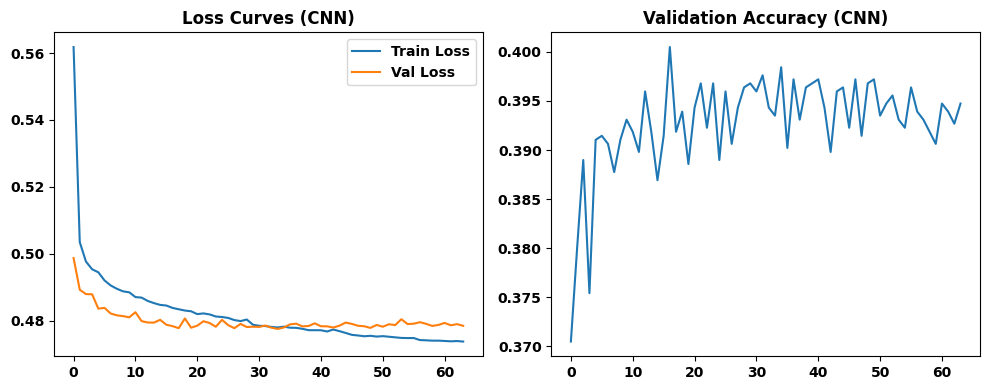

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import time
# -----------------------------------------------------------
# 1) Load 8-feature dataset
# -----------------------------------------------------------
X = np.loadtxt("dataset_X_v2.txt")
y_int = np.loadtxt("dataset_y_v2.txt").astype(int)

print("Loaded X:", X.shape, " y:", y_int.shape)

# -----------------------------------------------------------
# 2) Convert integer labels 0..15 → 4-bit vectors
# -----------------------------------------------------------
def int_to_bits(n):
    return np.array([int(b) for b in format(n, "04b")], dtype=np.float32)

y_bits = np.array([int_to_bits(v) for v in y_int], dtype=np.float32)
print("Converted y_bits shape:", y_bits.shape)

# -----------------------------------------------------------
# 3) Utility: reshape X → (4,2) matrix per sample
# -----------------------------------------------------------
def reshape_input_4x2(x):
    return x.reshape(4, 2)

# -----------------------------------------------------------
# PyTorch Dataset
# -----------------------------------------------------------
class QubitCNN_Dataset(Dataset):
    def __init__(self, X, y):
        """
        X shape: (N, 8)
        reshape to (4,2) and add channel dimension → (1,4,2)
        """
        X_reshaped = np.array([reshape_input_4x2(x) for x in X], dtype=np.float32)
        X_reshaped = np.expand_dims(X_reshaped, axis=1)  # → (N, 1, 4, 2)

        self.X = torch.tensor(X_reshaped, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)   # shape (N, 4)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# -----------------------------------------------------------
# 4) Stratified Split
# -----------------------------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_bits, test_size=0.30, stratify=y_int, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

train_ds = QubitCNN_Dataset(X_train, y_train)
val_ds   = QubitCNN_Dataset(X_val, y_val)
test_ds  = QubitCNN_Dataset(X_test, y_test)

print("Train:", len(train_ds), "Val:", len(val_ds), "Test:", len(test_ds))

# -----------------------------------------------------------
# 5) DataLoaders
# -----------------------------------------------------------
batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)

# -----------------------------------------------------------
# 6) CNN Architecture (confirmed by you)
# -----------------------------------------------------------
class QubitCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=(2,1), stride=1),  # → (batch, 8, 3, 2)
            nn.ReLU(),

            nn.Conv2d(8, 16, kernel_size=(2,1), stride=1), # → (batch,16,2,2)
            nn.ReLU(),

            nn.Flatten()
        )

        # compute flattened size: 16 * 2 * 2 = 64
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 4)   # output logits for 4 bits
        )
    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x   # logits (BCEWithLogitsLoss will apply Sigmoid internally)

model = QubitCNN()

# -----------------------------------------------------------
# 7) Loss, Optimizer, Scheduler
# -----------------------------------------------------------
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0007)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.7, patience=10
)

# -----------------------------------------------------------
# 8) Accuracy function for 4-bit output
# -----------------------------------------------------------
def bitwise_accuracy(logits, target_bits):
    probs = torch.sigmoid(logits)
    preds = (probs > 0.5).float()
    exact = (preds == target_bits).all(dim=1)
    return exact.float().mean().item()

# -----------------------------------------------------------
# 9) Training Loop with Early Stopping
# -----------------------------------------------------------
EPOCHS = 120
best_val_loss = float("inf")
patience = 30
counter = 0

train_losses = []
val_losses = []
val_acc_list = []



start_time = time.time()

for epoch in range(EPOCHS):
    # ---------- TRAIN ----------
    model.train()
    train_loss_sum = 0
    train_acc_sum = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()
        train_acc_sum += bitwise_accuracy(logits, yb)

    train_loss = train_loss_sum / len(train_loader)
    train_acc = train_acc_sum / len(train_loader)
    train_losses.append(train_loss)

    # ---------- VALIDATION ----------
    model.eval()
    val_loss_sum = 0
    val_acc_sum = 0

    with torch.no_grad():
        for xb, yb in val_loader:
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss_sum += loss.item()
            val_acc_sum += bitwise_accuracy(logits, yb)

    val_loss = val_loss_sum / len(val_loader)
    val_acc = val_acc_sum / len(val_loader)
    val_losses.append(val_loss)
    val_acc_list.append(val_acc)

    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f}")

    # ---------- Early Stopping ----------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_cnn_model.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")
# -----------------------------------------------------------
# 10) Testing
# -----------------------------------------------------------
model.load_state_dict(torch.load("best_cnn_model.pt"))
model.eval()

test_acc_sum = 0
with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb)
        test_acc_sum += bitwise_accuracy(logits, yb)

test_acc = test_acc_sum / len(test_loader)

print("\n🔥 Final Test Accuracy (CNN 4-bit):", 100 * test_acc, "%")

# -----------------------------------------------------------
# 11) Plot Loss & Accuracy
# -----------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curves (CNN)")

plt.subplot(1,2,2)
plt.plot(val_acc_list)
plt.title("Validation Accuracy (CNN)")

plt.tight_layout()
plt.show()


#### Preprocessing

C:\Users\10\AppData\Local\Temp\ipykernel_1472\985601396.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


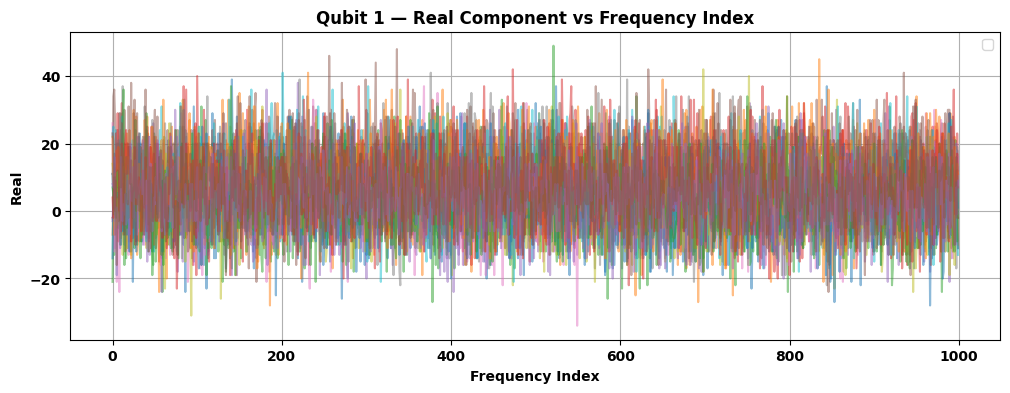

C:\Users\10\AppData\Local\Temp\ipykernel_1472\985601396.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


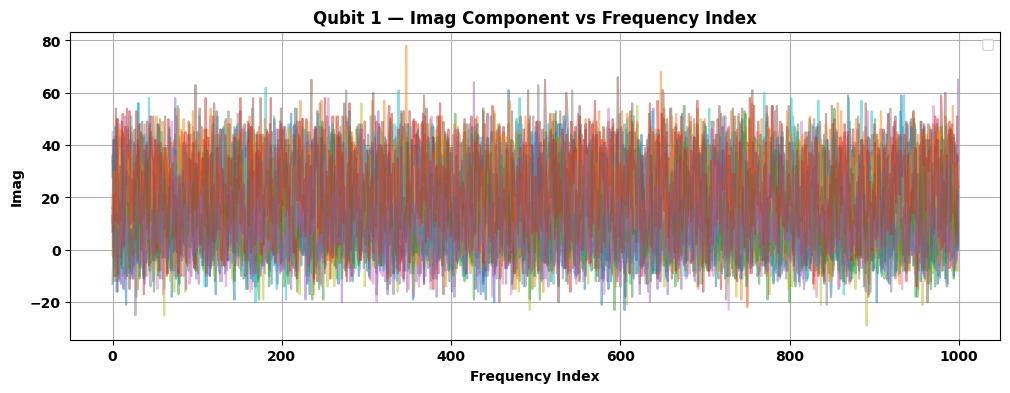

C:\Users\10\AppData\Local\Temp\ipykernel_1472\985601396.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


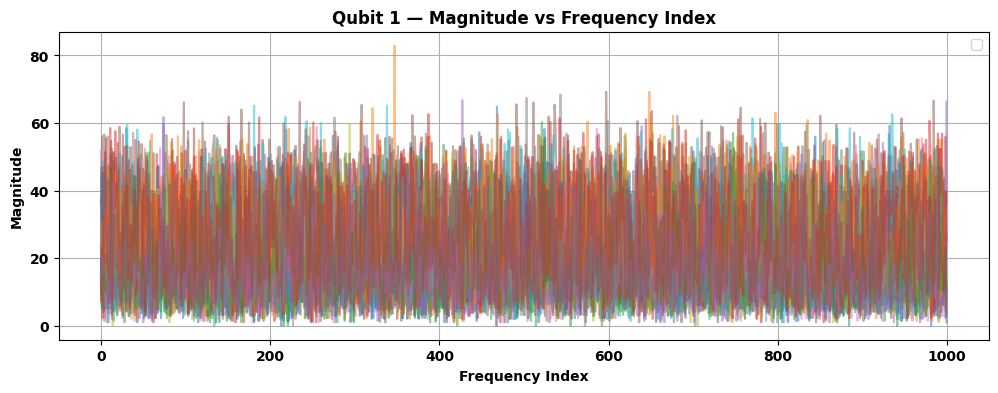

C:\Users\10\AppData\Local\Temp\ipykernel_1472\985601396.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


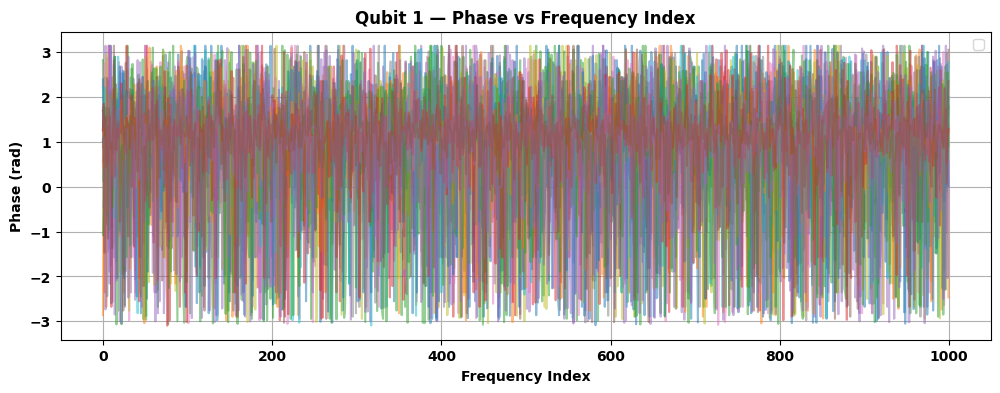

In [17]:
###  DATA ENGINEERING WITH ADVANCED FEATURES

# for each qubit find the patern!

# -----------------------------------------------------------
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import math

# Helper: convert "(a+bj)" string to complex
def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

# Load all 16 files
folder = "quadrature_data_4qubits"
files = sorted(glob.glob(os.path.join(folder, "*.txt")))

qubit0_data_per_label = {}

for file in files:
    filename = os.path.basename(file).replace(".txt", "")
    label_bits = filename  # e.g. "0101"
    bit0 = int(label_bits[0])  # first bit of label

    with open(file, "r") as f:
        lines = f.readlines()

    # The first line is data for qubit 1
    line0 = lines[0].strip().split()
    qubit0_complex = np.array([parse_complex_string(v) for v in line0])

    # Organize by 0 or 1 label for the first qubit
    if bit0 not in qubit0_data_per_label:
        qubit0_data_per_label[bit0] = []
    qubit0_data_per_label[bit0].append(qubit0_complex)


# Convert lists to arrays
for bit in qubit0_data_per_label:
    qubit0_data_per_label[bit] = np.array(qubit0_data_per_label[bit])


# -----------------------------
# Plot Real Component
# -----------------------------
plt.figure(figsize=(12,4))
for bit in [0,1]:
    for sample in qubit0_data_per_label[bit]:
        plt.plot(sample.real, alpha=0.5, label=f"bit0={bit}" if sample is qubit0_data_per_label[bit][0] else "")
plt.title("Qubit 1 — Real Component vs Frequency Index")
plt.xlabel("Frequency Index")
plt.ylabel("Real")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------
# Plot Imag Component
# -----------------------------
plt.figure(figsize=(12,4))
for bit in [0,1]:
    for sample in qubit0_data_per_label[bit]:
        plt.plot(sample.imag, alpha=0.5, label=f"bit0={bit}" if sample is qubit0_data_per_label[bit][0] else "")
plt.title("Qubit 1 — Imag Component vs Frequency Index")
plt.xlabel("Frequency Index")
plt.ylabel("Imag")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------
# Plot Magnitude
# -----------------------------
plt.figure(figsize=(12,4))
for bit in [0,1]:
    for sample in qubit0_data_per_label[bit]:
        plt.plot(np.abs(sample), alpha=0.5, label=f"bit0={bit}" if sample is qubit0_data_per_label[bit][0] else "")
plt.title("Qubit 1 — Magnitude vs Frequency Index")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------
# Plot Phase
# -----------------------------
plt.figure(figsize=(12,4))
for bit in [0,1]:
    for sample in qubit0_data_per_label[bit]:
        phase = np.angle(sample)
        plt.plot(phase, alpha=0.5, label=f"bit0={bit}" if sample is qubit0_data_per_label[bit][0] else "")
plt.title("Qubit 1 — Phase vs Frequency Index")
plt.xlabel("Frequency Index")
plt.ylabel("Phase (rad)")
plt.legend()
plt.grid(True)
plt.show()


Group 0: (8000,)
Group 1: (8000,)


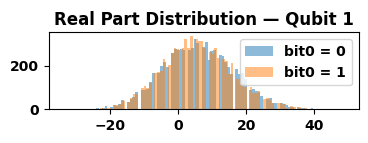

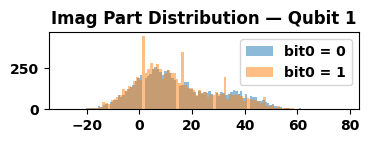

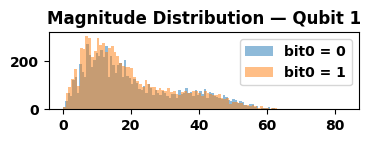

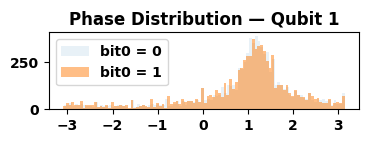

In [22]:
### focus on the first qubit only! 8000 of file name starting with 0 and 8000 with 1

import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import math

def parse_complex_string(s):
    return complex(s.strip().replace("(", "").replace(")", ""))

folder = "quadrature_data_4qubits"
files = sorted(glob.glob(os.path.join(folder, "*.txt")))

data_label0 = []
data_label1 = []

for file in files:
    filename = os.path.basename(file).replace(".txt", "")
    bit0 = int(filename[0])   # first bit of label
    
    with open(file, "r") as f:
        first_line = f.readlines()[0].strip().split()
    
    complex_values = np.array([parse_complex_string(v) for v in first_line])

    if bit0 == 0:
        data_label0.append(complex_values)
    else:
        data_label1.append(complex_values)

# Convert to arrays: (8, 1000) for each
data_label0 = np.array(data_label0)   # shape (8, 1000)
data_label1 = np.array(data_label1)   # shape (8, 1000)

# Flatten to 8000 samples
data_label0 = data_label0.reshape(-1)
data_label1 = data_label1.reshape(-1)

print("Group 0:", data_label0.shape)
print("Group 1:", data_label1.shape)

# -----------------------------------------
# Compute real, imag, mag, phase
# -----------------------------------------
real0 = data_label0.real
real1 = data_label1.real

imag0 = data_label0.imag
imag1 = data_label1.imag

mag0 = np.abs(data_label0)
mag1 = np.abs(data_label1)

phase0 = np.angle(data_label0)
phase1 = np.angle(data_label1)

# -----------------------------------------
# Plot histograms
# -----------------------------------------
plt.figure(figsize=(4,1))
plt.hist(real0, bins=100, alpha=0.5, label="bit0 = 0")
plt.hist(real1, bins=100, alpha=0.5, label="bit0 = 1")
plt.title("Real Part Distribution — Qubit 1")
plt.legend()
plt.show()

plt.figure(figsize=(4,1))
plt.hist(imag0, bins=100, alpha=0.5, label="bit0 = 0")
plt.hist(imag1, bins=100, alpha=0.5, label="bit0 = 1")
plt.title("Imag Part Distribution — Qubit 1")
plt.legend()
plt.show()

plt.figure(figsize=(4,1))
plt.hist(mag0, bins=100, alpha=0.5, label="bit0 = 0")
plt.hist(mag1, bins=100, alpha=0.5, label="bit0 = 1")
plt.title("Magnitude Distribution — Qubit 1")
plt.legend()
plt.show()

plt.figure(figsize=(4,1))
plt.hist(phase0, bins=100, alpha=0.1, label="bit0 = 0")
plt.hist(phase1, bins=100, alpha=0.5, label="bit0 = 1")
plt.title("Phase Distribution — Qubit 1")
plt.legend()
plt.show()


In [23]:
### another strategy is to plot histograms for qubit 1
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# ---------- Helper: convert "(a+bj)" to complex ----------
def parse_complex_string(s):
    return complex(s.strip().replace("(", "").replace(")", ""))

# ---------- Load full waveforms for qubit 1 ----------
def load_qubit1_waveforms(folder="quadrature_data_4qubits"):
    files = sorted(glob.glob(os.path.join(folder, "*.txt")))

    X_complex = []   # هر ردیف: 1000 عدد مختلط برای کیوبیت 1
    y_bit0    = []   # بیت اول برچسب (0 یا 1)
    labels    = []   # رشته کامل برچسب (مثل "0101")

    for file in files:
        fname = os.path.basename(file).replace(".txt", "")
        bit0  = int(fname[0])   # بیت اول

        with open(file, "r") as f:
            lines = f.readlines()

        # سطر اول: داده‌های کیوبیت اول (۱۰۰۰ عدد مختلط)
        first_line = lines[0].strip().split()
        complex_values = np.array([parse_complex_string(v) for v in first_line])

        X_complex.append(complex_values)
        y_bit0.append(bit0)
        labels.append(fname)

    X_complex = np.array(X_complex)   # شکل: (16, 1000)
    y_bit0    = np.array(y_bit0)      # شکل: (16,)

    print("Waveforms shape (qubit1):", X_complex.shape)
    print("bit0 labels:", y_bit0)
    print("file labels:", labels)
    return X_complex, y_bit0, labels

X_q1, y_bit0, labels = load_qubit1_waveforms("quadrature_data_4qubits")


Waveforms shape (qubit1): (16, 1000)
bit0 labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
file labels: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


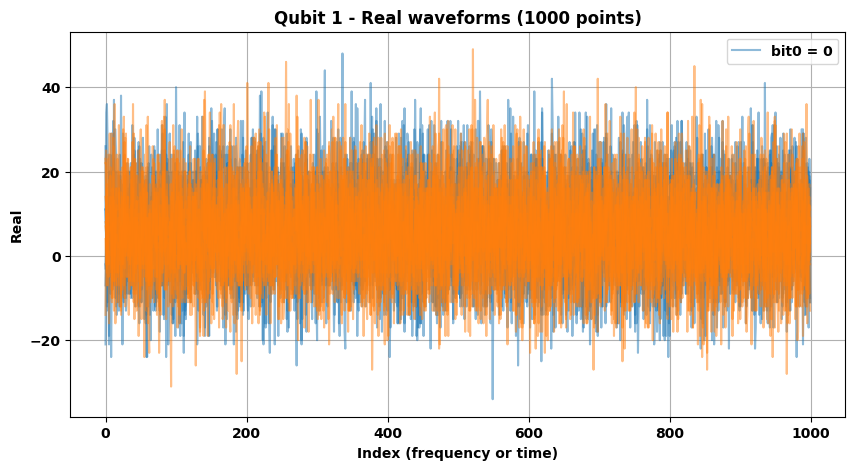

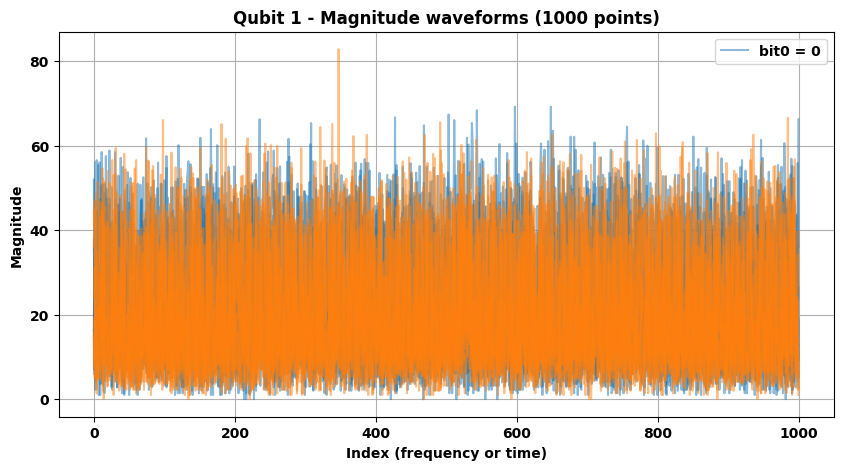

In [24]:
# ----------------- Plot all real parts -----------------
plt.figure(figsize=(10,5))
for i in range(len(X_q1)):
    if y_bit0[i] == 0:
        plt.plot(X_q1[i].real, alpha=0.5, color="tab:blue", label="bit0 = 0" if i == 0 else "")
    else:
        plt.plot(X_q1[i].real, alpha=0.5, color="tab:orange", label="bit0 = 1" if i == 1 else "")

plt.title("Qubit 1 - Real waveforms (1000 points)")
plt.xlabel("Index (frequency or time)")
plt.ylabel("Real")
plt.legend()
plt.grid(True)
plt.show()

# ----------------- Plot all magnitudes -----------------
plt.figure(figsize=(10,5))
for i in range(len(X_q1)):
    mag = np.abs(X_q1[i])
    if y_bit0[i] == 0:
        plt.plot(mag, alpha=0.5, color="tab:blue", label="bit0 = 0" if i == 0 else "")
    else:
        plt.plot(mag, alpha=0.5, color="tab:orange", label="bit0 = 1" if i == 1 else "")

plt.title("Qubit 1 - Magnitude waveforms (1000 points)")
plt.xlabel("Index (frequency or time)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


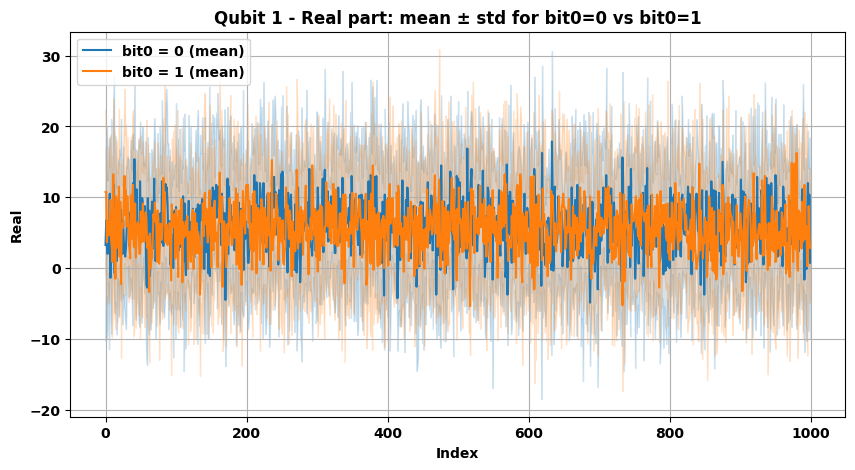

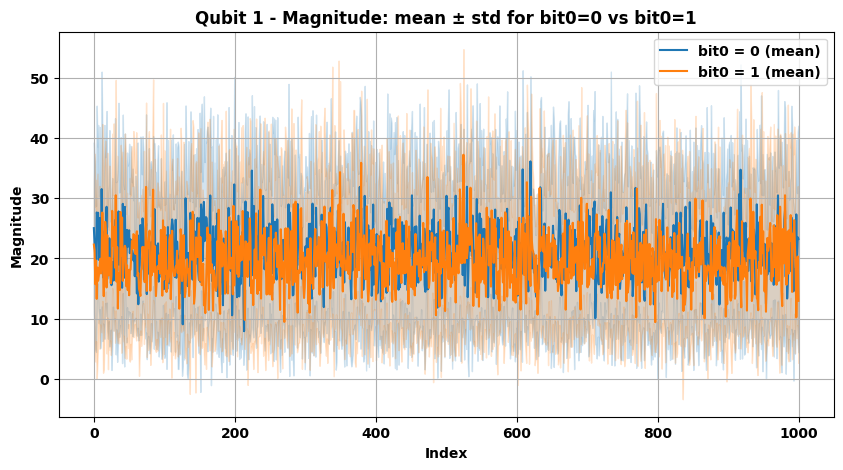

In [25]:
# جدا کردن دو گروه
group0 = X_q1[y_bit0 == 0]   # شکل: (8, 1000)
group1 = X_q1[y_bit0 == 1]   # شکل: (8, 1000)

# -------- Real part: mean ± std --------
mean_real0 = group0.real.mean(axis=0)
std_real0  = group0.real.std(axis=0)

mean_real1 = group1.real.mean(axis=0)
std_real1  = group1.real.std(axis=0)

x = np.arange(X_q1.shape[1])

plt.figure(figsize=(10,5))
plt.plot(x, mean_real0, color="tab:blue", label="bit0 = 0 (mean)")
plt.fill_between(x, mean_real0-std_real0, mean_real0+std_real0, 
                 color="tab:blue", alpha=0.2)

plt.plot(x, mean_real1, color="tab:orange", label="bit0 = 1 (mean)")
plt.fill_between(x, mean_real1-std_real1, mean_real1+std_real1, 
                 color="tab:orange", alpha=0.2)

plt.title("Qubit 1 - Real part: mean ± std for bit0=0 vs bit0=1")
plt.xlabel("Index")
plt.ylabel("Real")
plt.legend()
plt.grid(True)
plt.show()

# -------- Magnitude: mean ± std --------
mag0 = np.abs(group0)
mag1 = np.abs(group1)

mean_mag0 = mag0.mean(axis=0)
std_mag0  = mag0.std(axis=0)

mean_mag1 = mag1.mean(axis=0)
std_mag1  = mag1.std(axis=0)

plt.figure(figsize=(10,5))
plt.plot(x, mean_mag0, color="tab:blue", label="bit0 = 0 (mean)")
plt.fill_between(x, mean_mag0-std_mag0, mean_mag0+std_mag0,
                 color="tab:blue", alpha=0.2)

plt.plot(x, mean_mag1, color="tab:orange", label="bit0 = 1 (mean)")
plt.fill_between(x, mean_mag1-std_mag1, mean_mag1+std_mag1,
                 color="tab:orange", alpha=0.2)

plt.title("Qubit 1 - Magnitude: mean ± std for bit0=0 vs bit0=1")
plt.xlabel("Index")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


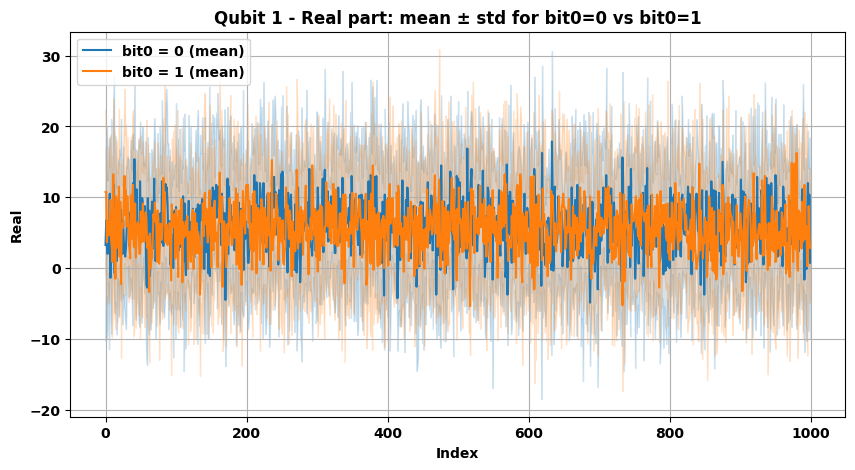

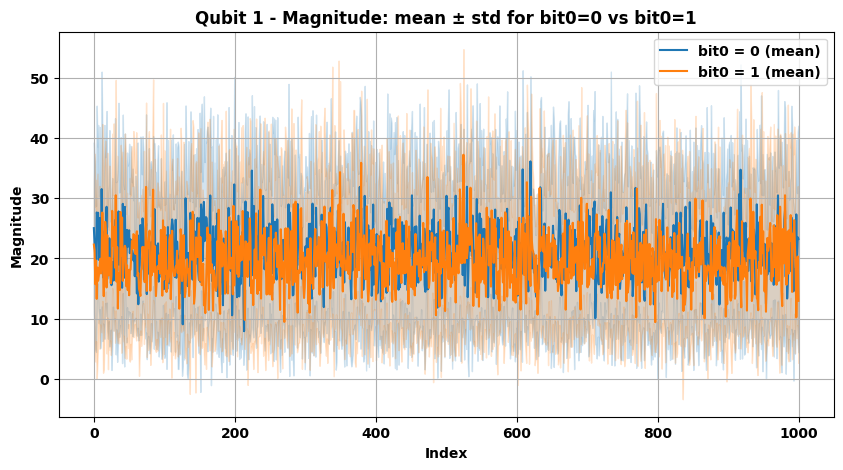

In [26]:
# جدا کردن دو گروه
group0 = X_q1[y_bit0 == 0]   # شکل: (8, 1000)
group1 = X_q1[y_bit0 == 1]   # شکل: (8, 1000)

# -------- Real part: mean ± std --------
mean_real0 = group0.real.mean(axis=0)
std_real0  = group0.real.std(axis=0)

mean_real1 = group1.real.mean(axis=0)
std_real1  = group1.real.std(axis=0)

x = np.arange(X_q1.shape[1])

plt.figure(figsize=(10,5))
plt.plot(x, mean_real0, color="tab:blue", label="bit0 = 0 (mean)")
plt.fill_between(x, mean_real0-std_real0, mean_real0+std_real0, 
                 color="tab:blue", alpha=0.2)

plt.plot(x, mean_real1, color="tab:orange", label="bit0 = 1 (mean)")
plt.fill_between(x, mean_real1-std_real1, mean_real1+std_real1, 
                 color="tab:orange", alpha=0.2)

plt.title("Qubit 1 - Real part: mean ± std for bit0=0 vs bit0=1")
plt.xlabel("Index")
plt.ylabel("Real")
plt.legend()
plt.grid(True)
plt.show()

# -------- Magnitude: mean ± std --------
mag0 = np.abs(group0)
mag1 = np.abs(group1)

mean_mag0 = mag0.mean(axis=0)
std_mag0  = mag0.std(axis=0)

mean_mag1 = mag1.mean(axis=0)
std_mag1  = mag1.std(axis=0)

plt.figure(figsize=(10,5))
plt.plot(x, mean_mag0, color="tab:blue", label="bit0 = 0 (mean)")
plt.fill_between(x, mean_mag0-std_mag0, mean_mag0+std_mag0,
                 color="tab:blue", alpha=0.2)

plt.plot(x, mean_mag1, color="tab:orange", label="bit0 = 1 (mean)")
plt.fill_between(x, mean_mag1-std_mag1, mean_mag1+std_mag1,
                 color="tab:orange", alpha=0.2)

plt.title("Qubit 1 - Magnitude: mean ± std for bit0=0 vs bit0=1")
plt.xlabel("Index")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


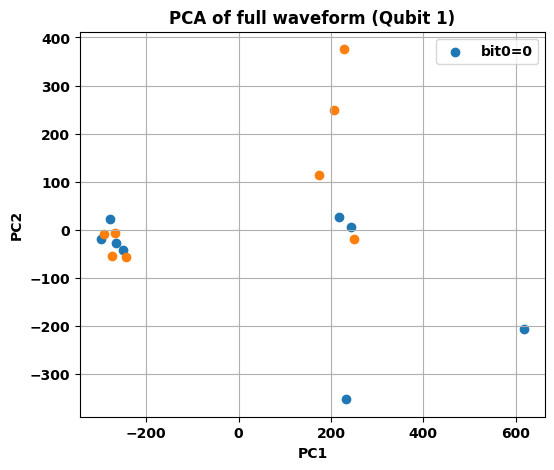

In [28]:
from sklearn.decomposition import PCA

# بردار ویژگی: برای هر فایل → [real(1000), imag(1000)]
X_features = np.hstack([X_q1.real, X_q1.imag])   # شکل: (16, 2000)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

plt.figure(figsize=(6,5))
for i in range(len(X_pca)):
    if y_bit0[i] == 0:
        plt.scatter(X_pca[i,0], X_pca[i,1], color="tab:blue", label="bit0=0" if i == 0 else "")
    else:
        plt.scatter(X_pca[i,0], X_pca[i,1], color="tab:orange", label="bit0=1" if i == 1 else "")

plt.title("PCA of full waveform (Qubit 1)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
### modeling only on qubit 1 
import numpy as np

# Load full labels (0..15)
y_full = np.loadtxt("dataset_y_v2.txt").astype(int)

# Extract bit0: highest bit (مثلاً از 1011 → بیت اول = 1)
bit0 = ((y_full >> 3) & 1).astype(int)

print("Unique bit0 labels:", np.unique(bit0))



Unique bit0 labels: [0 1]


In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

X = np.loadtxt("dataset_X_v2.txt").astype(np.float32)
y = bit0  # فقط بیت اول

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (16000, 8)
y shape: (16000,)


In [34]:
class QubitDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)  # برای BCE نیاز به float است

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

train_ds = QubitDataset(X_train, y_train)
test_ds  = QubitDataset(X_test,  y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64)


import torch.nn as nn

class BinaryQubitClassifier(nn.Module):
    def __init__(self, input_dim=8):  # اگر 16 فیچر دارید، عدد را 16 بگذارید
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # خروجی یک عدد
        )

    def forward(self, x):
        return self.net(x)
model = BinaryQubitClassifier(input_dim=X.shape[1])

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [35]:
EPOCHS = 40

for epoch in range(EPOCHS):
    model.train()
    correct = 0
    total = 0
    total_loss = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb).squeeze()
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = (torch.sigmoid(logits) >= 0.5).float()
        correct += (preds == yb).sum().item()
        total += len(yb)

    train_acc = correct / total
    print(f"Epoch {epoch:02d} | Loss={total_loss:.3f} | Train Acc={train_acc:.3f}")


Epoch 00 | Loss=100.838 | Train Acc=0.777
Epoch 01 | Loss=93.493 | Train Acc=0.803
Epoch 02 | Loss=92.778 | Train Acc=0.804
Epoch 03 | Loss=91.924 | Train Acc=0.806
Epoch 04 | Loss=91.592 | Train Acc=0.804
Epoch 05 | Loss=90.931 | Train Acc=0.808
Epoch 06 | Loss=91.172 | Train Acc=0.805
Epoch 07 | Loss=90.849 | Train Acc=0.809
Epoch 08 | Loss=90.750 | Train Acc=0.808
Epoch 09 | Loss=90.544 | Train Acc=0.806
Epoch 10 | Loss=90.167 | Train Acc=0.808
Epoch 11 | Loss=90.137 | Train Acc=0.810
Epoch 12 | Loss=89.654 | Train Acc=0.809
Epoch 13 | Loss=89.707 | Train Acc=0.810
Epoch 14 | Loss=89.452 | Train Acc=0.809
Epoch 15 | Loss=89.496 | Train Acc=0.809
Epoch 16 | Loss=89.094 | Train Acc=0.809
Epoch 17 | Loss=88.810 | Train Acc=0.810
Epoch 18 | Loss=88.755 | Train Acc=0.811
Epoch 19 | Loss=88.657 | Train Acc=0.810
Epoch 20 | Loss=88.253 | Train Acc=0.812
Epoch 21 | Loss=88.458 | Train Acc=0.811
Epoch 22 | Loss=87.846 | Train Acc=0.812
Epoch 23 | Loss=87.843 | Train Acc=0.812
Epoch 24 | Loss

In [36]:
### model testing
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb).squeeze()
        preds = (torch.sigmoid(logits) >= 0.5).float()
        correct += (preds == yb).sum().item()
        total += len(yb)

test_acc = correct / total
print("\nFinal Test Accuracy:", test_acc)



Final Test Accuracy: 0.8071875


In [37]:
### equvalent code for CNN model

import numpy as np

# Load X (shape: 16000 × 8) and full labels (0..15)
X = np.loadtxt("dataset_X_v2.txt").astype(np.float32)
y_full = np.loadtxt("dataset_y_v2.txt").astype(int)

# Extract first qubit (bit0)
y = ((y_full >> 3) & 1).astype(np.float32)  # Convert to 0/1
print("X:", X.shape, "y:", y.shape)
# reshape each feature vector of length 8 into 1×4×2
X_reshaped = X.reshape(-1, 1, 4, 2)
print("Reshaped:", X_reshaped.shape)


import torch
from torch.utils.data import Dataset, DataLoader

class QubitCNN_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.20, stratify=y, random_state=42
)

train_ds = QubitCNN_Dataset(X_train, y_train)
test_ds  = QubitCNN_Dataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64)


X: (16000, 8) y: (16000,)
Reshaped: (16000, 1, 4, 2)


In [39]:
import torch.nn as nn

class BinaryQubitCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(2,2), stride=1),  # → shape: (16, 3, 1)
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=(2,1), stride=1), # → shape: (32, 2, 0) depends on dims
            nn.ReLU()
        )

        # compute flatten size dynamically
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 4, 2)
            flat_dim = self.cnn(dummy).numel()

        self.fc = nn.Sequential(
            nn.Linear(flat_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = BinaryQubitCNN()

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


EPOCHS = 30

for epoch in range(EPOCHS):
    model.train()
    correct = 0
    total = 0
    total_loss = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb).squeeze()
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = (torch.sigmoid(logits) >= 0.5).float()
        correct += (preds == yb).sum().item()
        total += len(yb)

    train_acc = correct / total
    print(f"Epoch {epoch:02d} | Loss={total_loss:.3f} | Train Acc={train_acc:.3f}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb).squeeze()
        preds = (torch.sigmoid(logits) >= 0.5).float()
        correct += (preds == yb).sum().item()
        total += len(yb)

test_acc = correct / total
print("\nFinal Test Accuracy:", test_acc)




Epoch 00 | Loss=96.768 | Train Acc=0.793
Epoch 01 | Loss=92.992 | Train Acc=0.803
Epoch 02 | Loss=91.950 | Train Acc=0.807
Epoch 03 | Loss=91.868 | Train Acc=0.805
Epoch 04 | Loss=91.696 | Train Acc=0.808
Epoch 05 | Loss=91.278 | Train Acc=0.806
Epoch 06 | Loss=91.325 | Train Acc=0.807
Epoch 07 | Loss=90.992 | Train Acc=0.809
Epoch 08 | Loss=90.729 | Train Acc=0.809
Epoch 09 | Loss=90.748 | Train Acc=0.808
Epoch 10 | Loss=90.313 | Train Acc=0.809
Epoch 11 | Loss=90.360 | Train Acc=0.811
Epoch 12 | Loss=90.171 | Train Acc=0.811
Epoch 13 | Loss=90.054 | Train Acc=0.810
Epoch 14 | Loss=90.113 | Train Acc=0.809
Epoch 15 | Loss=89.880 | Train Acc=0.810
Epoch 16 | Loss=89.545 | Train Acc=0.810
Epoch 17 | Loss=89.554 | Train Acc=0.809
Epoch 18 | Loss=89.460 | Train Acc=0.810
Epoch 19 | Loss=89.334 | Train Acc=0.810
Epoch 20 | Loss=88.916 | Train Acc=0.812
Epoch 21 | Loss=89.099 | Train Acc=0.811
Epoch 22 | Loss=88.561 | Train Acc=0.812
Epoch 23 | Loss=88.465 | Train Acc=0.813
Epoch 24 | Loss=

Group 0 shape: (8000,)
Group 1 shape: (8000,)


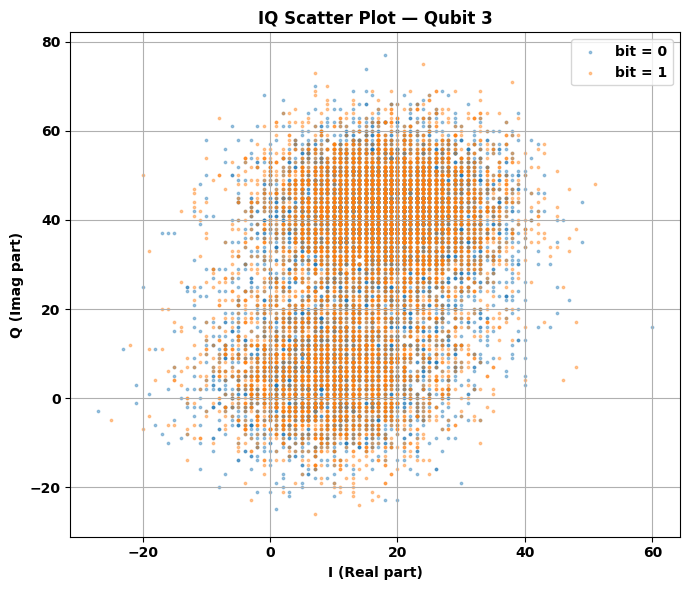

In [127]:
# Extract data for one qubit only
# qubit_index = 1 → Qubit 2

import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# -------------------------------
# Helper: "(a+bj)" → complex
# -------------------------------
def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

# -------------------------------
# Extract data for one qubit only
# qubit_index = 0 → Qubit 1
# qubit_index = 1 → Qubit 2
# -------------------------------
def load_qubit_data(folder, qubit_index):
    files = sorted(glob.glob(os.path.join(folder, "*.txt")))

    group0_I = []
    group0_Q = []
    group1_I = []
    group1_Q = []

    for path in files:
        fname = os.path.basename(path).replace(".txt", "")

        # label bit for chosen qubit
        bit = int(fname[qubit_index])     # 0 or 1

        with open(path, "r") as f:
            lines = f.readlines()

        # extract only the row for selected qubit
        line = lines[qubit_index].strip().split()

        complex_vals = np.array([parse_complex_string(v) for v in line])

        I = complex_vals.real
        Q = complex_vals.imag

        if bit == 0:
            group0_I.extend(I)
            group0_Q.extend(Q)
        else:
            group1_I.extend(I)
            group1_Q.extend(Q)

    return np.array(group0_I), np.array(group0_Q), np.array(group1_I), np.array(group1_Q)

qubit_index = 2 # Qubit n+1
# -------------------------------
# Plotting function for Qubit 2
# -------------------------------
def plot_qubit2_clusters(folder):
    g0_I, g0_Q, g1_I, g1_Q = load_qubit_data(folder, qubit_index)

    print("Group 0 shape:", g0_I.shape)
    print("Group 1 shape:", g1_I.shape)

    plt.figure(figsize=(7,6))
    plt.scatter(g0_I, g0_Q, s=3, alpha=0.4, label="bit = 0")
    plt.scatter(g1_I, g1_Q, s=3, alpha=0.4, label="bit = 1")

    plt.xlabel("I (Real part)")
    plt.ylabel("Q (Imag part)")
    plt.title(f"IQ Scatter Plot — Qubit {qubit_index+1}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Run for Qubit 2
# -------------------------------
plot_qubit2_clusters("quadrature_data_4qubits")


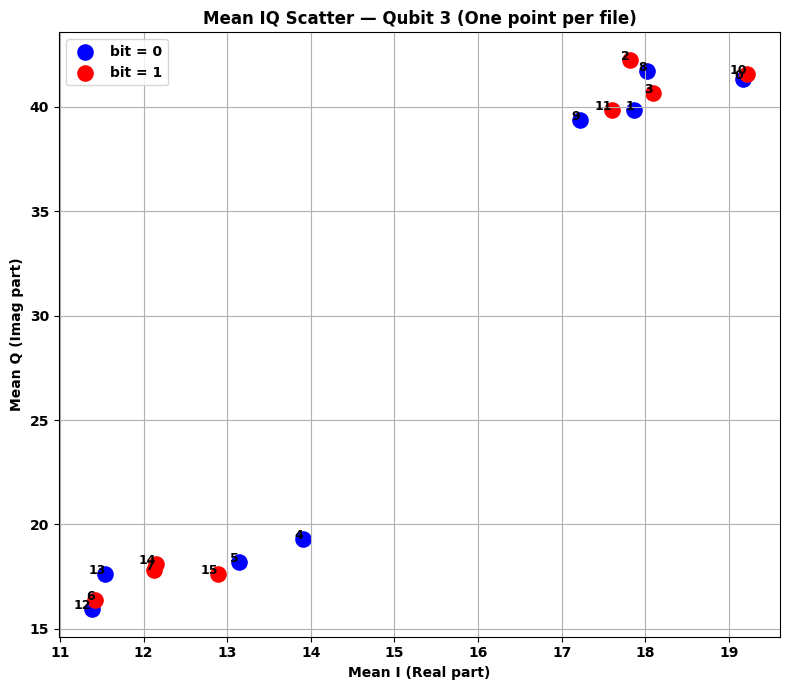

In [3]:
## Above code but a bit modified and take average of each 1000 points

import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# ----------------------------------------
# Helper: "(a+bj)" → complex number
# ----------------------------------------
def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

# ----------------------------------------
# Compute mean IQ point for each file
# ----------------------------------------
def compute_mean_IQ(folder, qubit_index):
    files = sorted(glob.glob(os.path.join(folder, "*.txt")))

    mean_I = []
    mean_Q = []
    bits  = []  # label (0 or 1) extracted from filename

    for path in files:
        fname = os.path.basename(path).replace(".txt", "")

        bit = int(fname[qubit_index])  # 0 or 1

        with open(path, "r") as f:
            lines = f.readlines()

        # extract 1000 complex values for selected qubit
        line = lines[qubit_index].strip().split()
        complex_vals = np.array([parse_complex_string(v) for v in line])

        # compute mean of IQ
        I_mean = complex_vals.real.mean()
        Q_mean = complex_vals.imag.mean()

        mean_I.append(I_mean)
        mean_Q.append(Q_mean)
        bits.append(bit)

    return np.array(mean_I), np.array(mean_Q), np.array(bits)


# ------------------------------------------------
# Plot mean IQ for all 16 files (only 16 points)
# ------------------------------------------------
def plot_mean_clusters(folder, qubit_index):
    mean_I, mean_Q, bits = compute_mean_IQ(folder, qubit_index)

    plt.figure(figsize=(8,7))

    # group 0
    plt.scatter(mean_I[bits == 0],
                mean_Q[bits == 0],
                s=120, color="blue",
                label="bit = 0")

    # group 1
    plt.scatter(mean_I[bits == 1],
                mean_Q[bits == 1],
                s=120, color="red",
                label="bit = 1")

    # annotate each point with filename index (optional)
    for i, (x, y) in enumerate(zip(mean_I, mean_Q)):
        plt.text(x, y, f"{i}", fontsize=9, ha="right")

    plt.xlabel("Mean I (Real part)")
    plt.ylabel("Mean Q (Imag part)")
    plt.title(f"Mean IQ Scatter — Qubit {qubit_index+1} (One point per file)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# -------------------------------
# Run for qubit_index = 2 (Qubit 3)
# -------------------------------
plot_mean_clusters("quadrature_data_4qubits", qubit_index=2)


Real values shape → bit0=0: (8000,) bit0=1: (8000,)


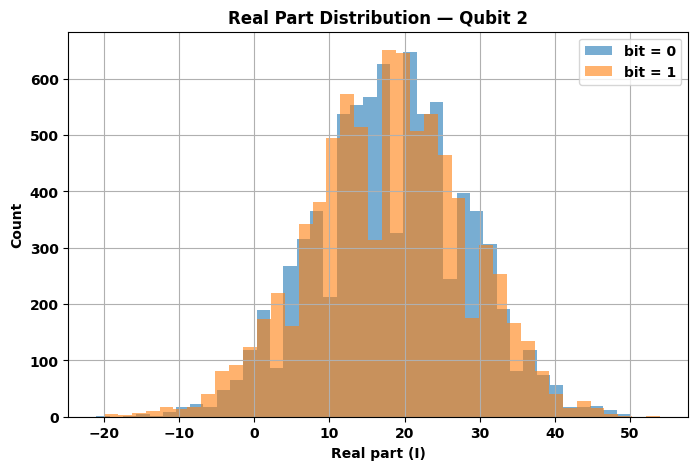

In [2]:
# رسم بخش حقیقیقی 
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

def load_qubit_real(folder, qubit_index):
    files = sorted(glob.glob(os.path.join(folder, "*.txt")))

    group0_I = []
    group1_I = []

    for path in files:
        fname = os.path.basename(path).replace(".txt", "")
        bit = int(fname[qubit_index])     # 0 or 1

        with open(path, "r") as f:
            lines = f.readlines()

        line = lines[qubit_index].strip().split()
        complex_vals = np.array([parse_complex_string(v) for v in line])

        I = complex_vals.real

        if bit == 0:
            group0_I.extend(I)
        else:
            group1_I.extend(I)

    return np.array(group0_I), np.array(group1_I)

qubit_index=3
def plot_real_only(folder):
    g0_I, g1_I = load_qubit_real(folder, qubit_index)

    print("Real values shape → bit0=0:", g0_I.shape, "bit0=1:", g1_I.shape)

    plt.figure(figsize=(8,5))
    plt.hist(g0_I, bins=40, alpha=0.6, label="bit = 0")
    plt.hist(g1_I, bins=40, alpha=0.6, label="bit = 1")
    plt.xlabel("Real part (I)")
    plt.ylabel("Count")
    plt.title("Real Part Distribution — Qubit 2")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_real_only("quadrature_data_4qubits")


Imag values shape → bit0=0: (8000,) bit0=1: (8000,)


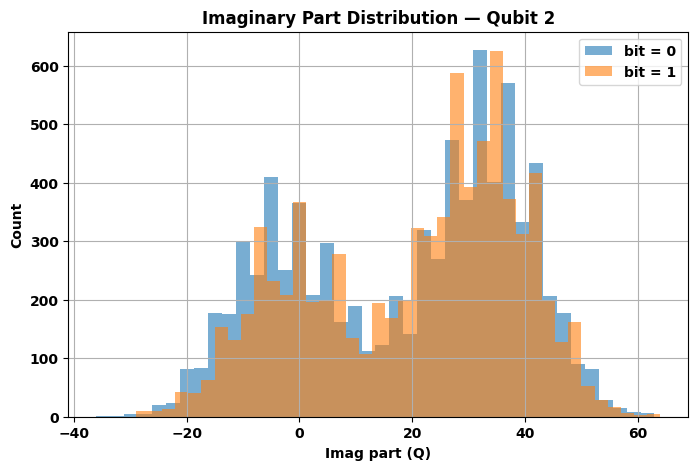

In [28]:
### رسم بخش موهومی
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

def load_qubit_imag(folder, qubit_index):
    files = sorted(glob.glob(os.path.join(folder, "*.txt")))

    group0_Q = []
    group1_Q = []

    for path in files:
        fname = os.path.basename(path).replace(".txt", "")
        bit = int(fname[qubit_index])     # 0 or 1

        with open(path, "r") as f:
            lines = f.readlines()

        line = lines[qubit_index].strip().split()
        complex_vals = np.array([parse_complex_string(v) for v in line])

        Q = complex_vals.imag

        if bit == 0:
            group0_Q.extend(Q)
        else:
            group1_Q.extend(Q)

    return np.array(group0_Q), np.array(group1_Q)

qubit_index=3
def plot_imag_only(folder):
    g0_Q, g1_Q = load_qubit_imag(folder, qubit_index)

    print("Imag values shape → bit0=0:", g0_Q.shape, "bit0=1:", g1_Q.shape)

    plt.figure(figsize=(8,5))
    plt.hist(g0_Q, bins=40, alpha=0.6, label="bit = 0")
    plt.hist(g1_Q, bins=40, alpha=0.6, label="bit = 1")
    plt.xlabel("Imag part (Q)")
    plt.ylabel("Count")
    plt.title("Imaginary Part Distribution — Qubit 2")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_imag_only("quadrature_data_4qubits")


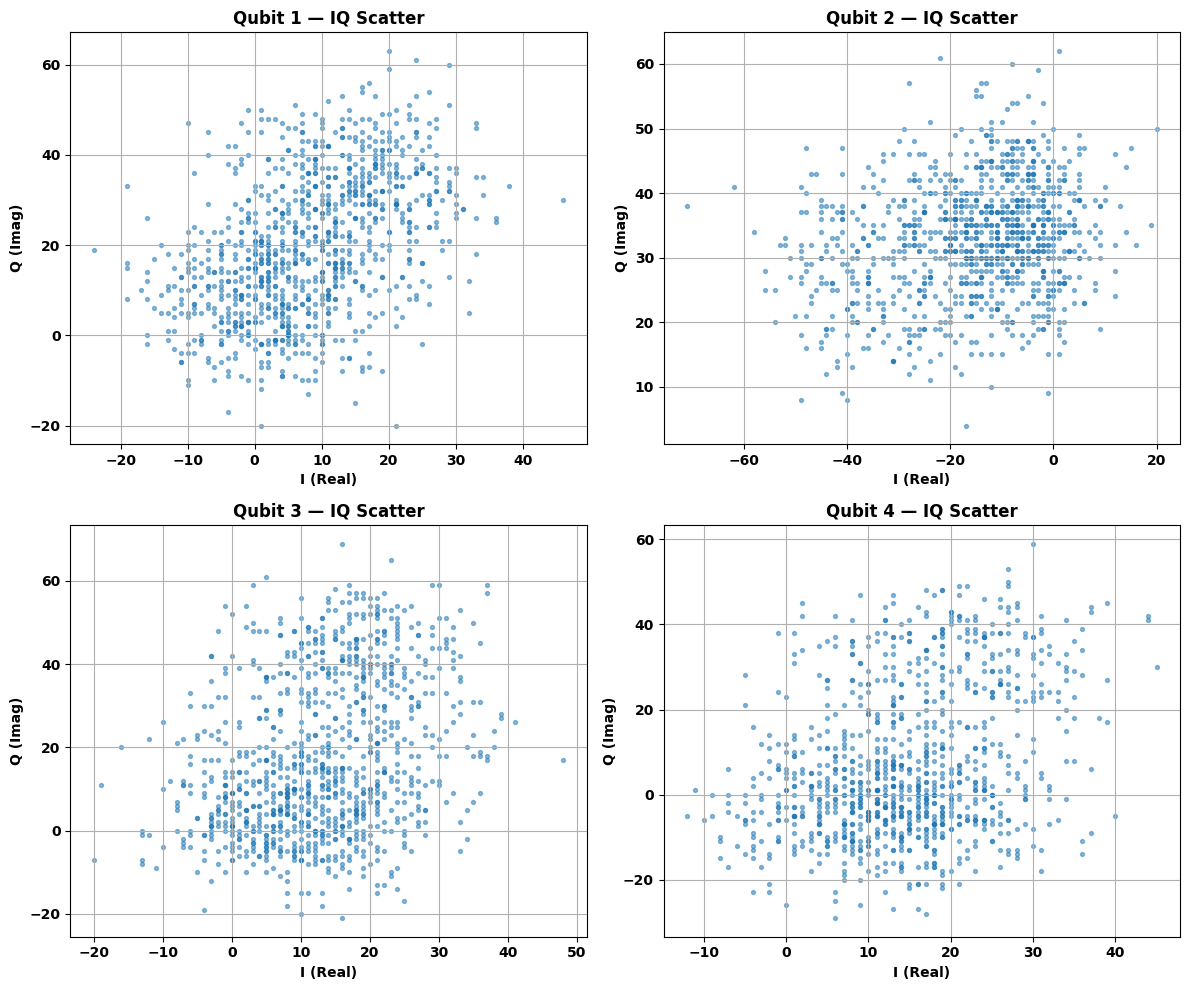

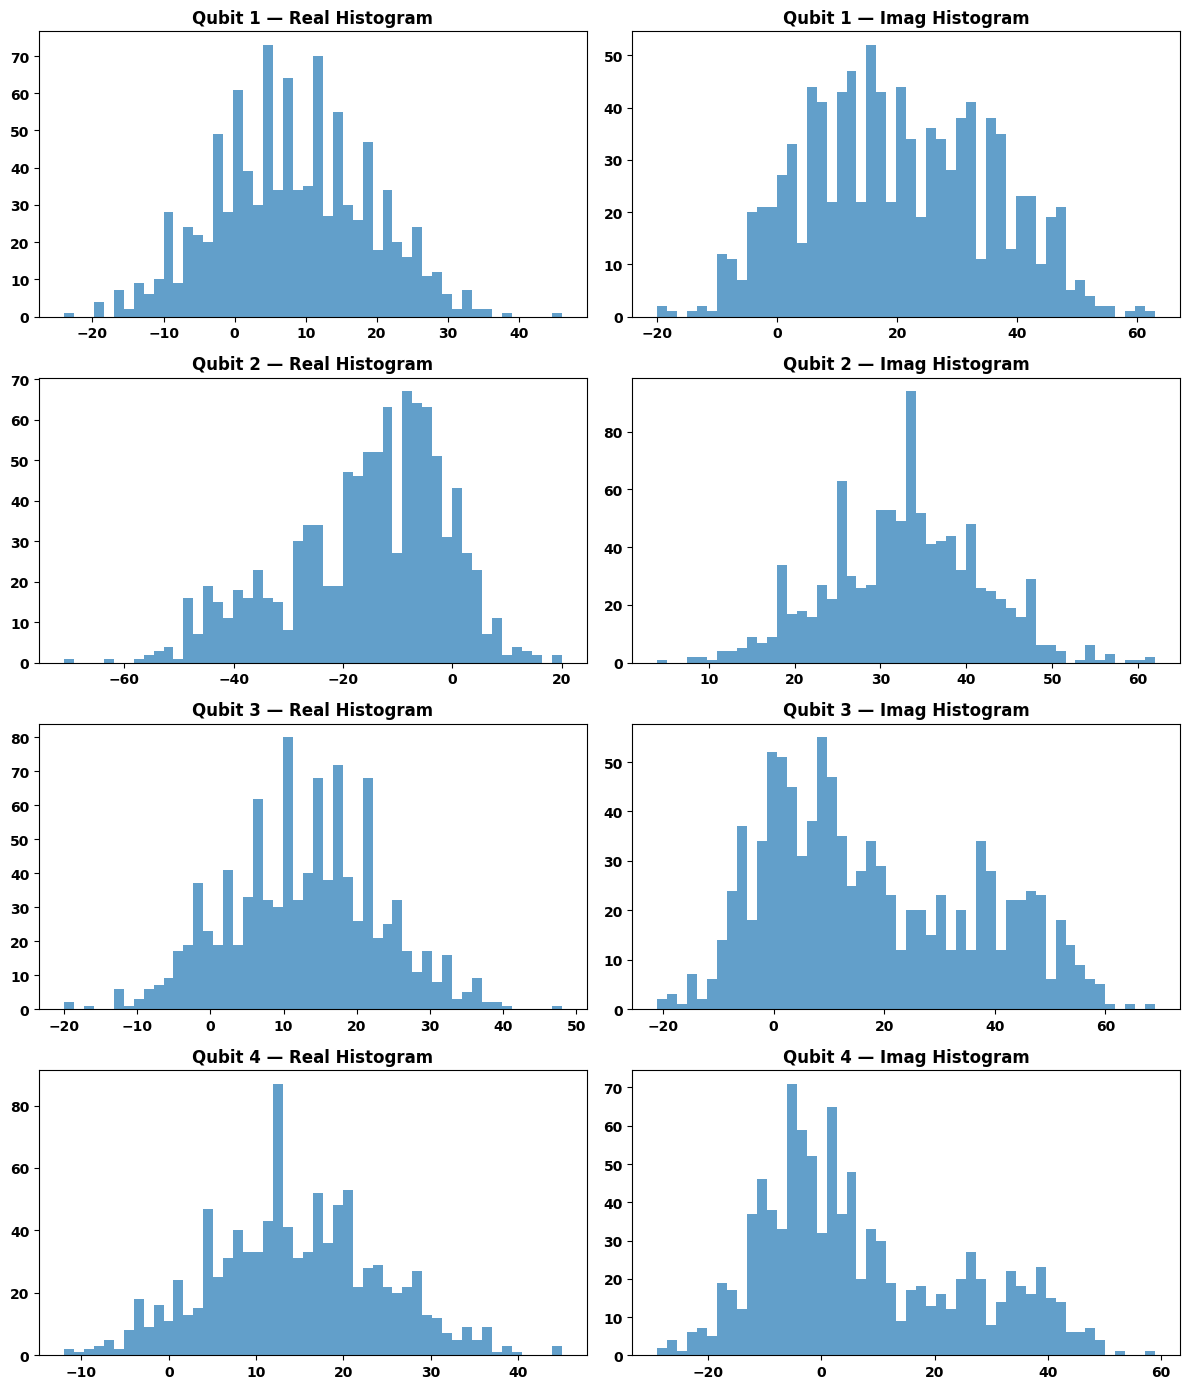

In [ ]:
# Plot IQ for all 4 qubits from 0000.txt
import numpy as np
import matplotlib.pyplot as plt

def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

def load_single_file(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()

    qubits = []
    for line in lines:
        vals = [parse_complex_string(v) for v in line.split()]
        qubits.append(np.array(vals))

    return qubits  # list of 4 arrays (each size 1000)


def plot_iq_for_single_file(file_path):
    qubits = load_single_file(file_path)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for idx, ax in enumerate(axes.flatten()):
        data = qubits[idx]
        I = data.real
        Q = data.imag

        ax.scatter(I, Q, s=8, alpha=0.5)
        ax.set_title(f"Qubit {idx+1} — IQ Scatter")
        ax.set_xlabel("I (Real)")
        ax.set_ylabel("Q (Imag)")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


def plot_histograms(file_path):
    qubits = load_single_file(file_path)

    fig, axes = plt.subplots(4, 2, figsize=(12, 14))

    for idx in range(4):
        data = qubits[idx]
        I = data.real
        Q = data.imag

        axes[idx, 0].hist(I, bins=50, alpha=0.7)
        axes[idx, 0].set_title(f"Qubit {idx+1} — Real Histogram")

        axes[idx, 1].hist(Q, bins=50, alpha=0.7)
        axes[idx, 1].set_title(f"Qubit {idx+1} — Imag Histogram")

    plt.tight_layout()
    plt.show()


# -----------------------
# Run for the file 0000
# -----------------------
file_path = "quadrature_data_4qubits/0000.txt"

plot_iq_for_single_file(file_path)
plot_histograms(file_path)


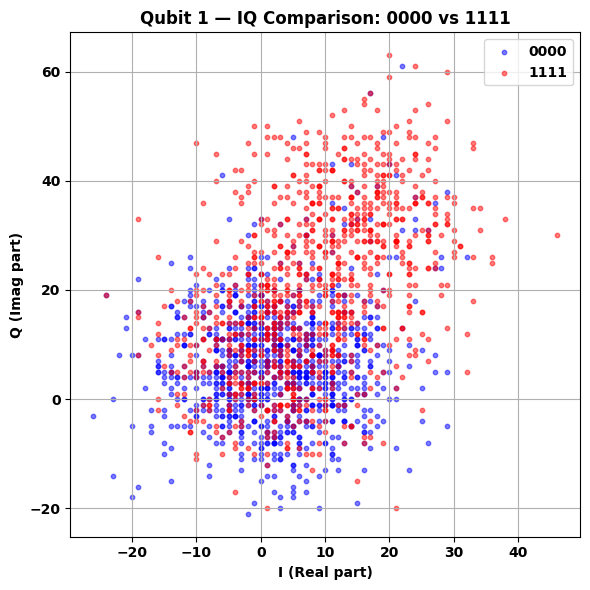

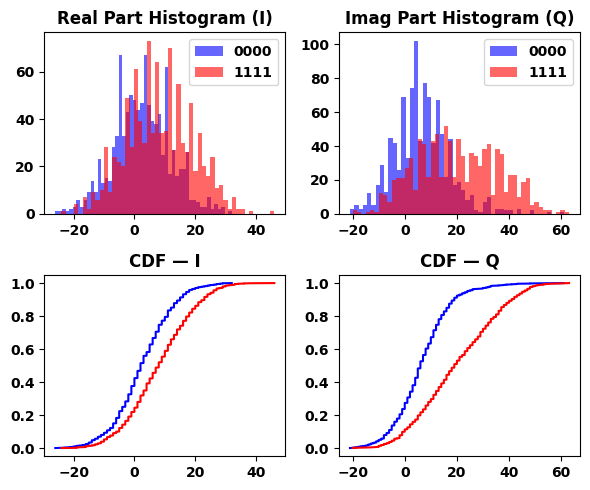

In [128]:
file0000 = "quadrature_data_4qubits/0000.txt"
file1111 = "quadrature_data_4qubits/1111.txt"

plot_compare_iq(file0000, file1111, qubit_index=0)
plot_compare_histograms(file0000, file1111, qubit_index=0)

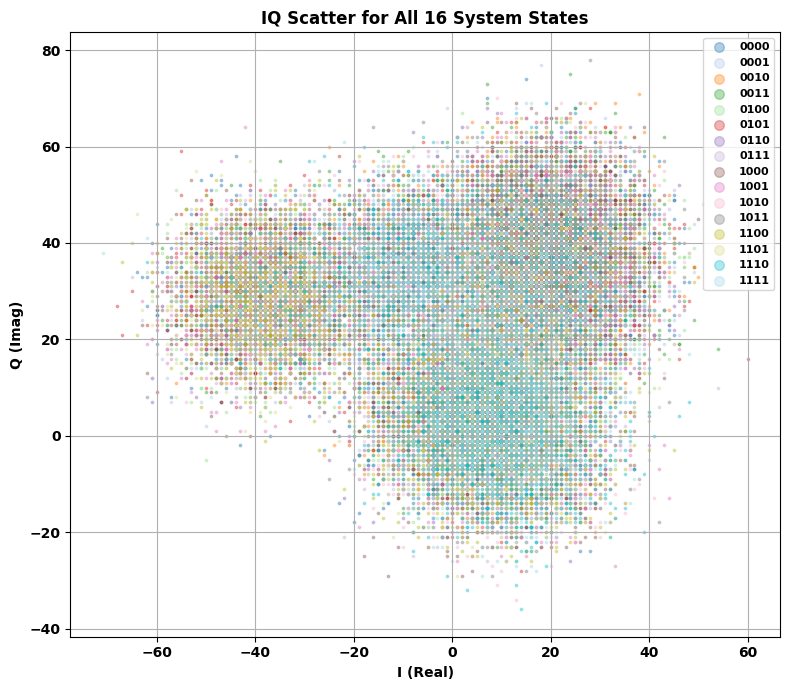

In [10]:
# کد کامل برای خوشه‌بندی چهار فایل با هم (0000, 0001, 0010, 0011)

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

def parse_complex_string(s):
    s = s.strip().replace("(", "").replace(")", "")
    return complex(s)

def load_file_full(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()

    all_complex = []
    for line in lines:
        vals = [parse_complex_string(v) for v in line.split()]
        all_complex.extend(vals)  # 1000 per line × 4 lines = 4000 values

    all_complex = np.array(all_complex)
    return all_complex.real, all_complex.imag


def plot_all_16_files(folder):
    files = sorted(glob.glob(os.path.join(folder, "*.txt")))
    colors = plt.cm.tab20(np.linspace(0, 1, 16))   # 20-color colormap

    plt.figure(figsize=(8,7))

    for idx, path in enumerate(files):
        fname = os.path.basename(path).replace(".txt", "")
        I, Q = load_file_full(path)

        plt.scatter(I, Q, s=3, alpha=0.35, color=colors[idx], label=fname)

    plt.xlabel("I (Real)")
    plt.ylabel("Q (Imag)")
    plt.title("IQ Scatter for All 16 System States")
    plt.legend(markerscale=4, fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ---- Run ----
plot_all_16_files("quadrature_data_4qubits")
